# Exploratory Analysis 

## Import data and process data 

In [2]:
# Import the packages 
import IPython
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from statistics import mode
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preview

In [3]:
# Read the dataset into the dataframe 
data = pd.read_csv("./diabetic_data.csv")

In [4]:
# Check the size of the dataset 
data.shape

(101766, 50)

In [5]:
# Check the overall information:data typle and null values
data.info()
"""The columns do not contain null values, so recheck the object data type"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

'The columns do not contain null values, so recheck the object data type'

In [6]:
# recheck the object data type 
for i in data.columns:
    if data[i].dtype==object:
        d= data[i].value_counts()
        print(pd.DataFrame(data=d))
"""There are no null values in the dataset"""

                  race
Caucasian        76099
AfricanAmerican  19210
?                 2273
Hispanic          2037
Other             1506
Asian              641
                 gender
Female            54708
Male              47055
Unknown/Invalid       3
            age
[70-80)   26068
[60-70)   22483
[50-60)   17256
[80-90)   17197
[40-50)    9685
[30-40)    3775
[90-100)   2793
[20-30)    1657
[10-20)     691
[0-10)      161
           weight
?           98569
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
    payer_code
?        40256
MC       32439
HM        6274
SP        5007
BC        4655
MD        3532
CP        2533
UN        2448
CM        1937
OG        1033
PO         592
DM         549
CH         146
WC         135
OT          95
MP          79
SI          55
FR           1
                               medical_specialty
?                                  

'There are no null values in the dataset'

In [7]:
# Check the numerical data values 
data.describe().transpose()

count          mean           std      min  \
encounter_id              101766.0  1.652016e+08  1.026403e+08  12522.0   
patient_nbr               101766.0  5.433040e+07  3.869636e+07    135.0   
admission_type_id         101766.0  2.024006e+00  1.445403e+00      1.0   
discharge_disposition_id  101766.0  3.715642e+00  5.280166e+00      1.0   
admission_source_id       101766.0  5.754437e+00  4.064081e+00      1.0   
time_in_hospital          101766.0  4.395987e+00  2.985108e+00      1.0   
num_lab_procedures        101766.0  4.309564e+01  1.967436e+01      1.0   
num_procedures            101766.0  1.339730e+00  1.705807e+00      0.0   
num_medications           101766.0  1.602184e+01  8.127566e+00      1.0   
number_outpatient         101766.0  3.693572e-01  1.267265e+00      0.0   
number_emergency          101766.0  1.978362e-01  9.304723e-01      0.0   
number_inpatient          101766.0  6.355659e-01  1.262863e+00      0.0   
number_diagnoses          101766.0  7.422607e+00  1.933600e+00      1.0   

                                 25%          50%           75%          max  
encounter_id              84961194.0  152388987.0  2.302709e+08  443867222.0  
patient_nbr               23413221.0   45505143.0  8.754595e+07  189502619.0  
admission_type_id                1.0          1.0  3.000000e+00          8.0  
discharge_disposition_id         1.0          1.0  4.000000e+00         28.0  
admission_source_id              1.0          7.0  7.000000e+00         25.0  
time_in_hospital                 2.0          4.0  6.000000e+00         14.0  
num_lab_procedures              31.0         44.0  5.700000e+01        132.0  
num_procedures                   0.0          1.0  2.000000e+00          6.0  
num_medications                 10.0         15.0  2.000000e+01         81.0  
number_outpatient                0.0          0.0  0.000000e+00         42.0  
number_emergency                 0.0          0.0  0.000000e+00         76.0  
number_inpatient                 0.0          0.0  1.000000e+00         21.0  
number_diagnoses                 6.0          8.0  9.000000e+00         16.0

 """description: 
         1) encounter_id and patient_nbr need to be cleaned;
         2) the maximum days for stay in hospital is 14 days
         3) average num_lab_procedures=43
         4) average num_medications=16
         5) average num_diagnoses=7.4 """

## Attribute Plotting 

### Readmission Rate Count 

<AxesSubplot:title={'center':'Readmission_count'}>

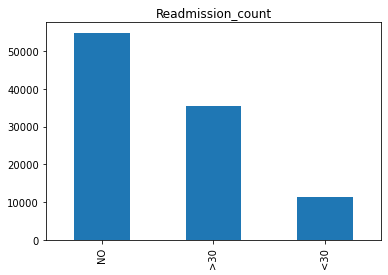

In [8]:
target_count=data['readmitted'].value_counts()
target_count.plot(kind='bar', title='Readmission_count')

### Age and Gender Count

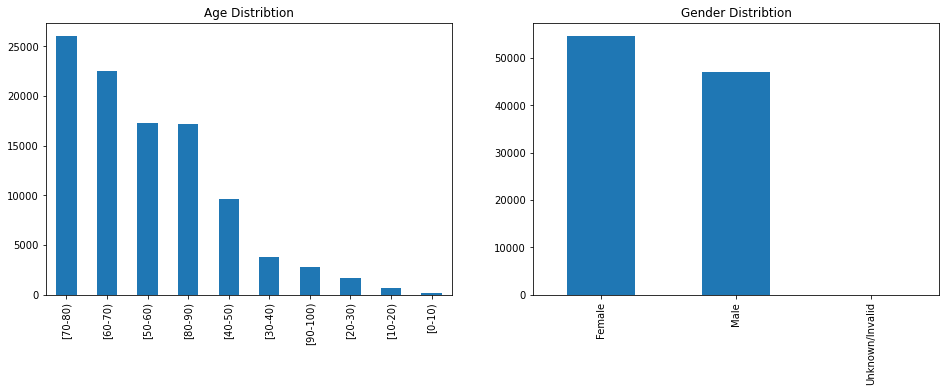

In [9]:
age_count=data["age"].value_counts()
gender_count=data["gender"].value_counts()# Have to deal with unkown/invalid count 
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,5))
_ = age_count.plot(kind='bar',title='Age Distribtion',ax=ax1)
_ = gender_count.plot(kind='bar',title='Gender Distribtion',ax=ax2)

### Race and Weight Count 

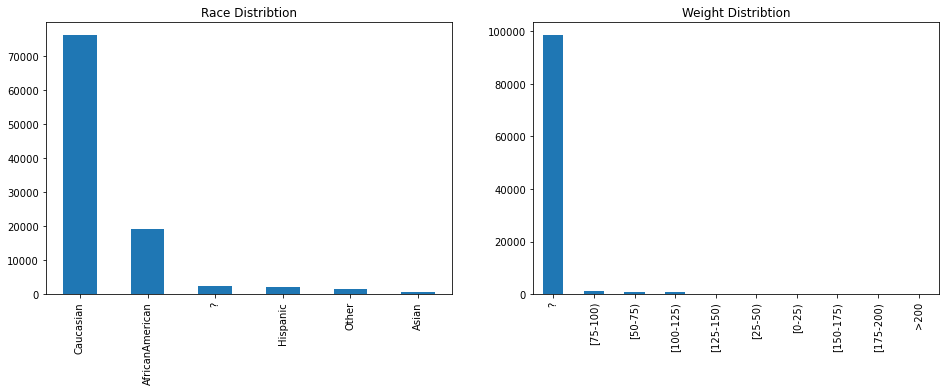

In [10]:
race_count=data["race"].value_counts()
weight_count=data["weight"].value_counts()# Have to deal with unkown/invalid count 
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,5))
_ = race_count.plot(kind='bar',title='Race Distribtion',ax=ax1)# Missing values
_ = weight_count.plot(kind='bar',title='Weight Distribtion',ax=ax2)# Missing values 

### Numerical data Distribution 

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


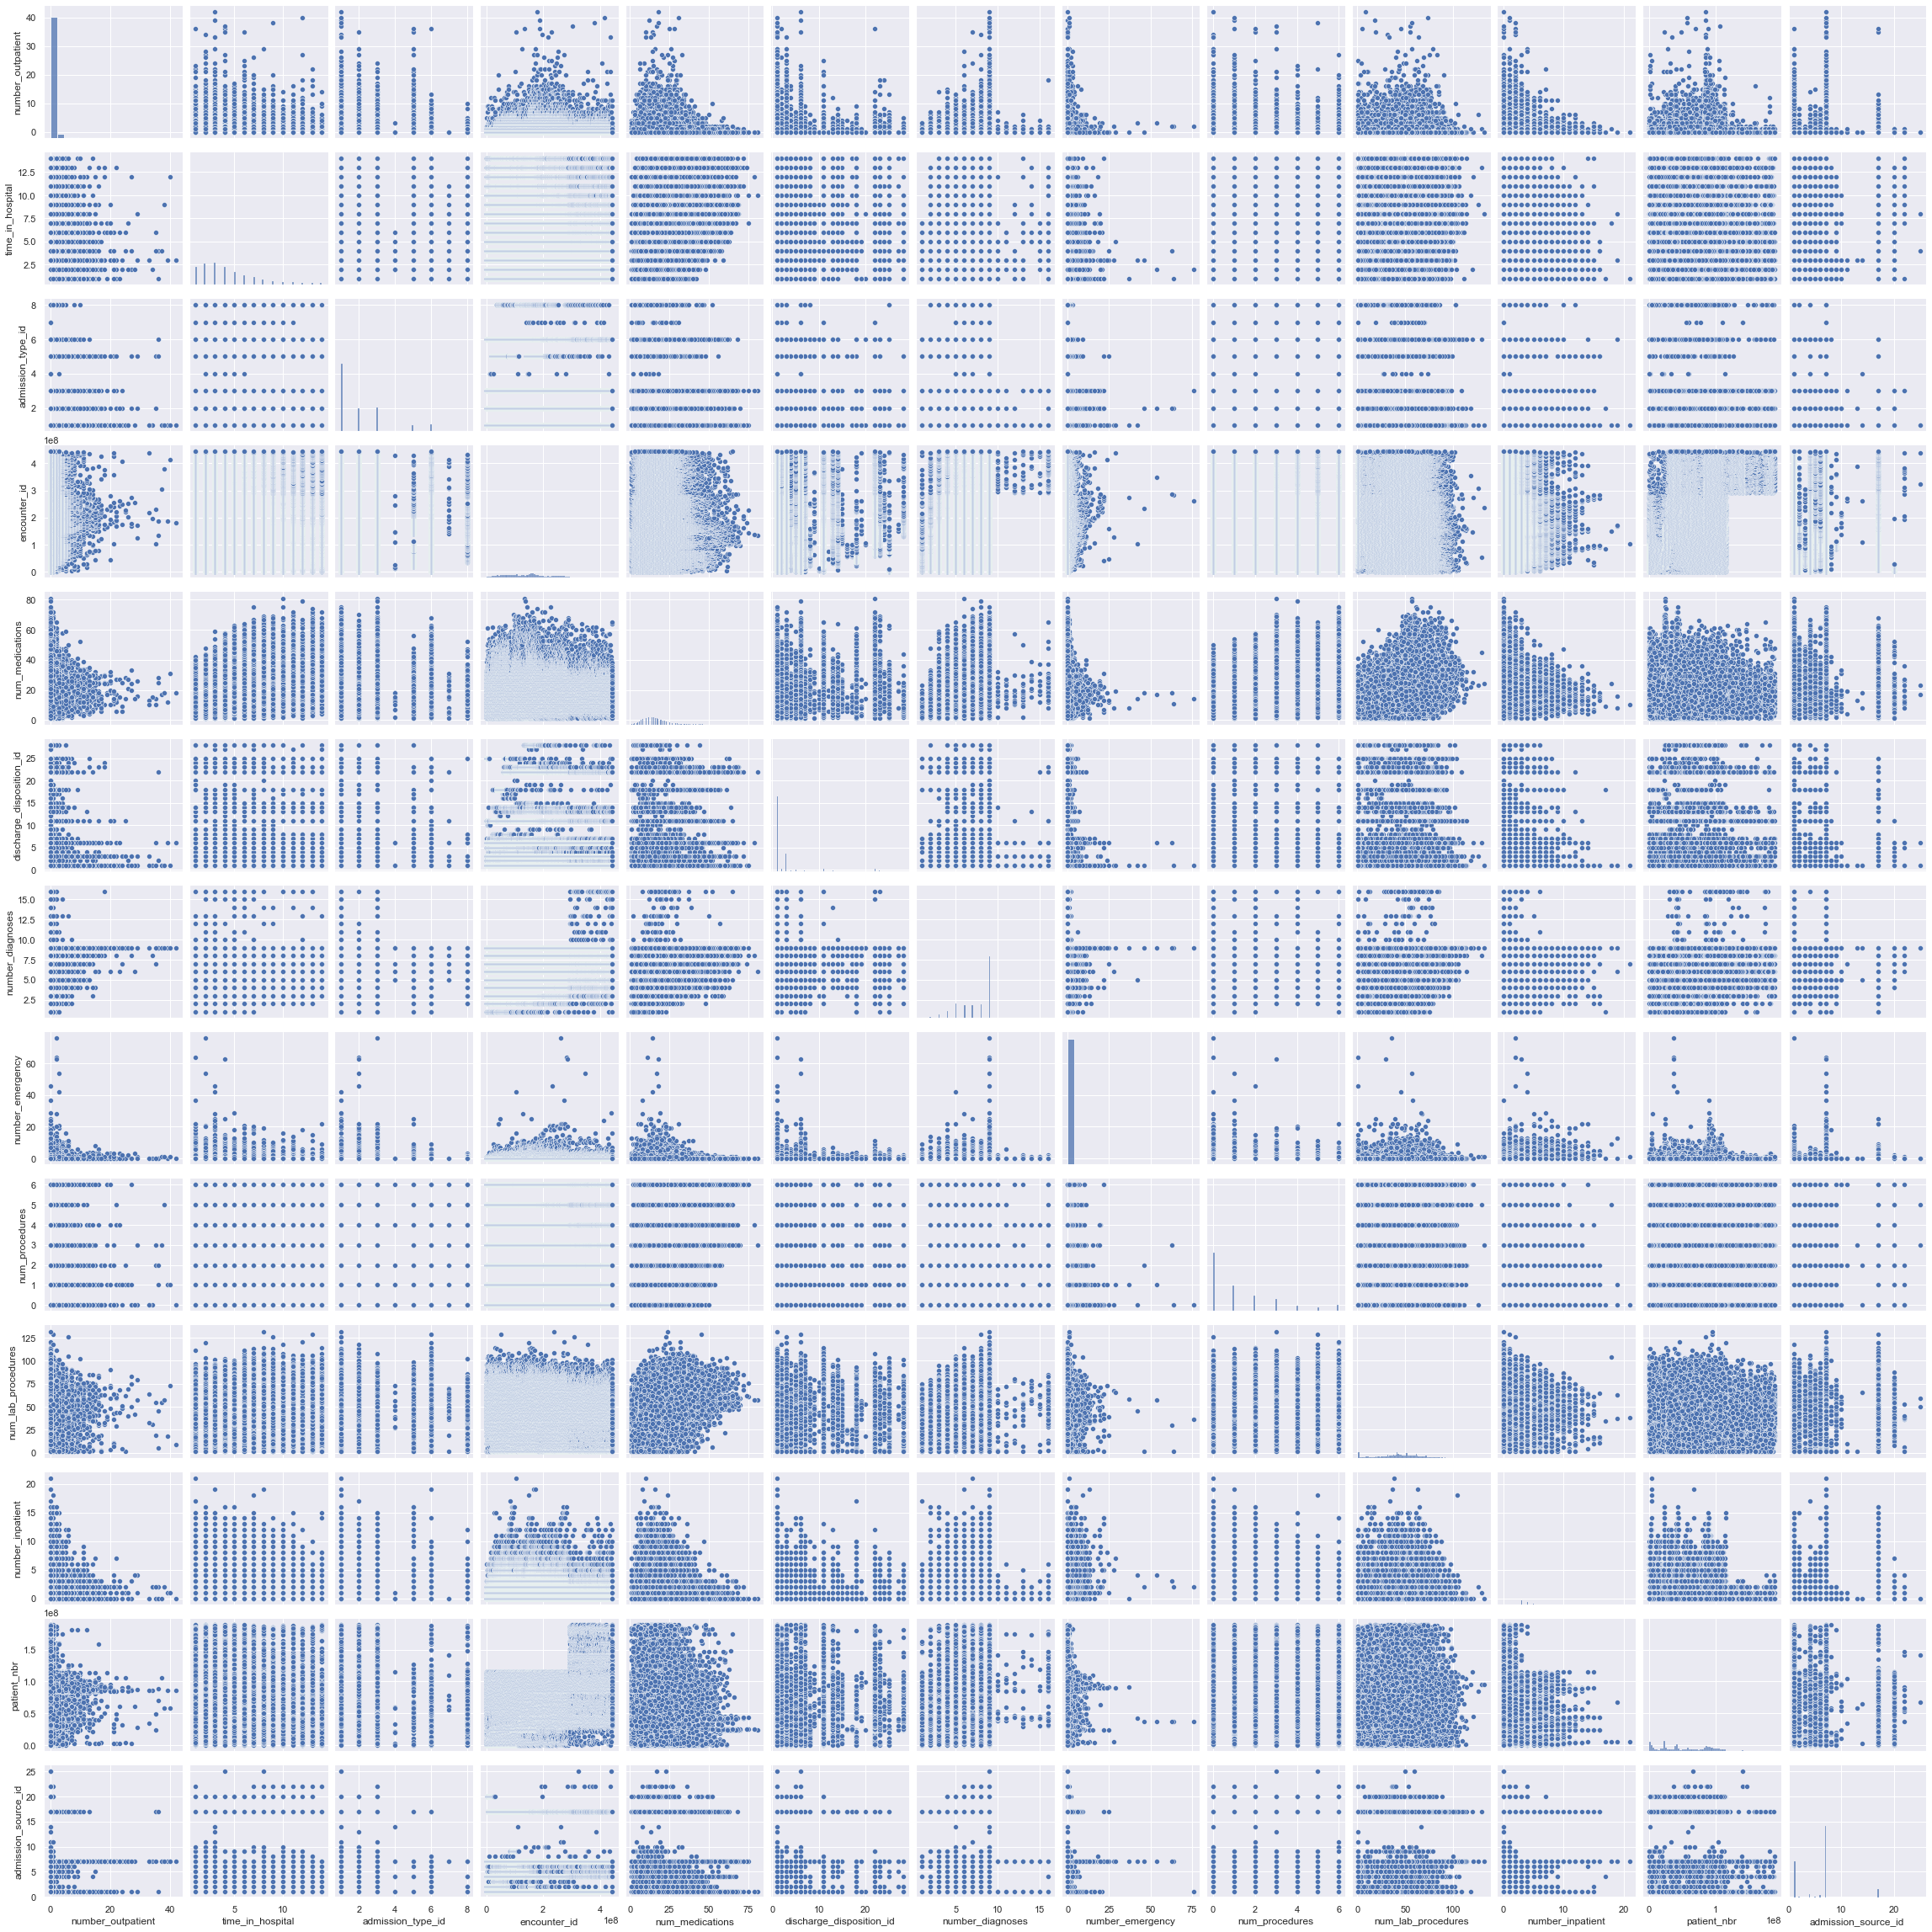

In [11]:
num_col = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
sns.set()
sns.pairplot(data[num_col], size = 2.5)
plt.show();

# Data Processing

In [12]:
# Make a copy of the file for pre-processing 
train = data.copy(deep=True)

## Processing object-type missing values

In [13]:
df = []
# Checkthe percentage of the missing values 
for col in train.columns:
    if train[col].dtype == object:
        count_missing = train[col][train[col] == '?'].count()
        percent_missing = (count_missing.sum()/train.shape[0]*100).round(2)
#         print(col,count_missing,percent_missing)
        df.append([col,count_missing,percent_missing])
missing_value=pd.DataFrame(df,columns=["col","count_missing","percent_missing"]).sort_values(by="percent_missing",ascending=False)
missing_value

col  count_missing  percent_missing
3                     weight          98569            96.86
5          medical_specialty          49949            49.08
4                 payer_code          40256            39.56
0                       race           2273             2.23
8                     diag_3           1423             1.40
7                     diag_2            358             0.35
6                     diag_1             21             0.02
29       glyburide-metformin              0             0.00
24              troglitazone              0             0.00
25                tolazamide              0             0.00
26                   examide              0             0.00
27               citoglipton              0             0.00
28                   insulin              0             0.00
33    metformin-pioglitazone              0             0.00
30       glipizide-metformin              0             0.00
31  glimepiride-pioglitazone              0             0.00
32   metformin-rosiglitazone              0             0.00
22                  acarbose              0             0.00
34                    change              0             0.00
35               diabetesMed              0             0.00
23                  miglitol              0             0.00
18                 glyburide              0             0.00
21             rosiglitazone              0             0.00
20              pioglitazone              0             0.00
19               tolbutamide              0             0.00
1                     gender              0             0.00
17                 glipizide              0             0.00
16             acetohexamide              0             0.00
15               glimepiride              0             0.00
14            chlorpropamide              0             0.00
13               nateglinide              0             0.00
12               repaglinide              0             0.00
11                 metformin              0             0.00
10                 A1Cresult              0             0.00
9              max_glu_serum              0             0.00
2                        age              0             0.00
36                readmitted              0             0.00

"""High missing values: 1. weight 2. medical_specialty 3. payer_code 4. race /
     Other values to clean: 1. diagosis_1 2. diagosis_2 3. diagnosis_3"""

### Drop high missing values 

In [14]:
# drop the irrelavant and high missing value variables
# drop weight because of its high missing value 97% 
# drop medical_specialty because of its high missing value 49.8%
train=train.drop(['weight','medical_specialty'],axis=1)
# drop payer_code because it is irrelevant to our studies 
train=train.drop(['payer_code'],axis=1)
# Drop only the missing values in all three diagonosis categories 
train = train.drop(set(train[(train['diag_1']== '?') & (train['diag_2'] == '?') & (train['diag_3'] == '?')].index))
# Drop the patients who is expired after discharge which is out of our interest population
train = train.drop(set(train[train['discharge_disposition_id']==11].index))

In [15]:
train.shape

(100123, 47)

### Drop missing values in 'Gender' and 'Race'

In [16]:
# Process the missing values in gender
print('gender', train['gender'][train['gender'] == 'Unknown/Invalid'].count()) #only 3 missing values 
train = train.drop(set(train['gender'][train['gender'] == 'Unknown/Invalid'].index))
# Process the missing values in race
train= train.drop(set(train['race'][train['race']=='?'].index)) # drop the 2273 missing values 

gender 3


In [17]:
train.shape

(97883, 47)

### Drop irrelevant variables

In [18]:
# Drop irrelevant variables and high percent missing varaibles 
train=train.drop(["encounter_id","patient_nbr"],axis=1)

In [19]:
# Drop two attributes citoglipton and examide that have the all same value
train=train.drop(["citoglipton","examide"],axis = 1)

## Creating/recoding new features

In [20]:
train.shape

(97883, 43)

"""Recoding Plan: In this section, we recode the following variables:
   1. new variable patient_service: This new feature includes the patients' use of hospital service
   2. new variable med_change: This new feature calculate the change of medication dose of a patient
   3. new variable num_med: This new feature calculate the number of medication usage of each patient """

### Create new feature: patient_service 

In [21]:
# Create a new feature service_utilization
train['patient_service'] = train['number_outpatient'] + train['number_emergency'] + train['number_inpatient']

### Create new feature: med_change

In [22]:
# Create a new variable to calculate the change of medication dose
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [23]:
for col in keys:
    col_name = str(col) + 'new' #change the column name 
    train[col_name] = train[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)# recode the med use into binary variable
train['med_change'] = 0
for col in keys:
    col_name = str(col) + 'new'
    train['med_change'] = train['med_change'] + train[col_name]
    del train[col_name]

In [24]:
# Check the status of the new feature med_change
train['med_change'].value_counts()

0    71177
1    25307
2     1288
3      106
4        5
Name: med_change, dtype: int64

### Create new feature: num_med

In [25]:
# calculate the number of medications used for each patient 
for col in keys:
    train[col] = train[col].replace('No', 0)
    train[col] = train[col].replace('Steady', 1)
    train[col] = train[col].replace('Up', 1)
    train[col] = train[col].replace('Down', 1) 
train['num_med'] = 0
for col in keys:
    train['num_med'] = train['num_med'] + train[col]

In [26]:
train['num_med'].value_counts()

1    45365
0    22454
2    21165
3     7537
4     1300
5       57
6        5
Name: num_med, dtype: int64

### Recode diagnosis into new categories 

In [27]:
"""diag_1=primary diagnosis; diag_2=secondary diagnosis; diag_3=additional diagnosis\
i"""
# duplicate a diagnosis column
train['primary_diag'] = train['diag_1']
train['secondary_diag'] = train['diag_2']
train['additional_diag'] = train['diag_3']

In [28]:
# replace the unknown values "?" with -1
train['primary_diag'] = train['primary_diag'].replace('?', -1)
train['secondary_diag'] = train['secondary_diag'].replace('?', -1)
train['additional_diag'] = train['additional_diag'].replace('?', -1)

In [29]:
train.additional_diag

0          -1
1         255
2         V27
3         403
4         250
         ... 
101761    458
101762    787
101763    296
101764    998
101765    787
Name: additional_diag, Length: 97883, dtype: object

In [30]:
train.diag_3

0           ?
1         255
2         V27
3         403
4         250
         ... 
101761    458
101762    787
101763    296
101764    998
101765    787
Name: diag_3, Length: 97883, dtype: object

In [31]:
# recode ICE code of V or E to “other” category = 0
train.loc[train['diag_1'].str.contains('V'), ['primary_diag']] = 0
train.loc[train['diag_1'].str.contains('E'), ['primary_diag']] = 0
train.loc[train['diag_2'].str.contains('V'), ['secondary_diag']] = 0
train.loc[train['diag_2'].str.contains('E'), ['secondary_diag']] = 0
train.loc[train['diag_3'].str.contains('V'), ['additional_diag']] = 0
train.loc[train['diag_3'].str.contains('E'), ['additional_diag']] = 0

In [32]:
# convert the data type to float to enable computations later
train['primary_diag'] = train['primary_diag'].astype(float)
train['secondary_diag'] = train['secondary_diag'].astype(float)
train['additional_diag'] = train['additional_diag'].astype(float)

In [33]:
# recode ICD codes of diag1,diag2,diag3 between certain ranges to certain categories
for index, row in train.iterrows():
    if (row['primary_diag'] >= 390 and row['primary_diag'] < 460) or (np.floor(row['primary_diag']) == 785):
        train.loc[index, 'primary_diag'] = 1
    elif (row['primary_diag'] >= 460 and row['primary_diag'] < 520) or (np.floor(row['primary_diag']) == 786):
        train.loc[index, 'primary_diag'] = 2
    elif (row['primary_diag'] >= 520 and row['primary_diag'] < 580) or (np.floor(row['primary_diag']) == 787):
        train.loc[index, 'primary_diag'] = 3
    elif (np.floor(row['primary_diag']) == 250):
        train.loc[index, 'primary_diag'] = 4
    elif (row['primary_diag'] >= 800 and row['primary_diag'] < 1000):
        train.loc[index, 'primary_diag'] = 5
    elif (row['primary_diag'] >= 710 and row['primary_diag'] < 740):
        train.loc[index, 'primary_diag'] = 6
    elif (row['primary_diag'] >= 580 and row['primary_diag'] < 630) or (np.floor(row['primary_diag']) == 788):
        train.loc[index, 'primary_diag'] = 7
    elif (row['primary_diag'] >= 140 and row['primary_diag'] < 240):
        train.loc[index, 'primary_diag'] = 8
    else:
        train.loc[index, 'primary_diag'] = 0

In [34]:
for index, row in train.iterrows():
    if (row['secondary_diag'] >= 390 and row['secondary_diag'] < 460) or (np.floor(row['secondary_diag']) == 785):
        train.loc[index, 'secondary_diag'] = 1
    elif (row['secondary_diag'] >= 460 and row['secondary_diag'] < 520) or (np.floor(row['secondary_diag']) == 786):
        train.loc[index, 'secondary_diag'] = 2
    elif (row['secondary_diag'] >= 520 and row['secondary_diag'] < 580) or (np.floor(row['secondary_diag']) == 787):
        train.loc[index, 'secondary_diag'] = 3
    elif (np.floor(row['secondary_diag']) == 250):
        train.loc[index, 'secondary_diag'] = 4
    elif (row['secondary_diag'] >= 800 and row['secondary_diag'] < 1000):
        train.loc[index, 'secondary_diag'] = 5
    elif (row['secondary_diag'] >= 710 and row['secondary_diag'] < 740):
        train.loc[index, 'secondary_diag'] = 6
    elif (row['secondary_diag'] >= 580 and row['secondary_diag'] < 630) or (np.floor(row['secondary_diag']) == 788):
        train.loc[index, 'secondary_diag'] = 7
    elif (row['secondary_diag'] >= 140 and row['secondary_diag'] < 240):
        train.loc[index, 'secondary_diag'] = 8
    else:
        train.loc[index, 'secondary_diag'] = 0

In [35]:
for index, row in train.iterrows():
    if (row['additional_diag'] >= 390 and row['additional_diag'] < 460) or (np.floor(row['additional_diag']) == 785):
        train.loc[index, 'additional_diag'] = 1
    elif (row['additional_diag'] >= 460 and row['additional_diag'] < 520) or (np.floor(row['additional_diag']) == 786):
        train.loc[index, 'additional_diag'] = 2
    elif (row['additional_diag'] >= 520 and row['additional_diag'] < 580) or (np.floor(row['additional_diag']) == 787):
        train.loc[index, 'additional_diag'] = 3
    elif (np.floor(row['additional_diag']) == 250):
        train.loc[index, 'additional_diag'] = 4
    elif (row['additional_diag'] >= 800 and row['additional_diag'] < 1000):
        train.loc[index, 'additional_diag'] = 5
    elif (row['additional_diag'] >= 710 and row['additional_diag'] < 740):
        train.loc[index, 'additional_diag'] = 6
    elif (row['additional_diag'] >= 580 and row['additional_diag'] < 630) or (np.floor(row['additional_diag']) == 788):
        train.loc[index, 'additional_diag'] = 7
    elif (row['additional_diag'] >= 140 and row['additional_diag'] < 240):
        train.loc[index, 'additional_diag'] = 8
    else:
        train.loc[index, 'additional_diag'] = 0

In [36]:
train[['diag_1','primary_diag']].head(15).T

0    1    2    3    4    5    6    7    8    9      10   11  \
diag_1        250.83  276  648    8  197  414  414  428  398  434  250.7  157   
primary_diag     4.0  0.0  0.0  0.0  8.0  1.0  1.0  1.0  1.0  1.0    4.0  8.0   

               12   13   14  
diag_1        428  428  518  
primary_diag  1.0  1.0  2.0

In [37]:
train[['diag_2','secondary_diag']].head(15).T

0       1    2       3    4    5    6    7    8    9    10  \
diag_2            ?  250.01  250  250.43  157  411  411  492  427  198  403   
secondary_diag  0.0     4.0  4.0     4.0  8.0  1.0  1.0  2.0  1.0  8.0  1.0   

                 11      12   13   14  
diag_2          288  250.43  411  998  
secondary_diag  0.0     4.0  1.0  5.0

In [38]:
train[['diag_3','additional_diag']].head(15).T

0    1    2    3    4    5    6    7    8    9    10   11  \
diag_3             ?  255  V27  403  250  250  V45  250   38  486  996  197   
additional_diag  0.0  0.0  0.0  1.0  4.0  4.0  0.0  4.0  0.0  2.0  5.0  8.0   

                    12   13   14  
diag_3           250.6  427  627  
additional_diag    4.0  1.0  7.0

### Recode admission_type_id and discharge_disposition_id and admission_source_id

In [39]:
"""Use the similarity of the categories to recode and reduct the categories"""

'Use the similarity of the categories to recode and reduct the categories'

In [40]:
train['admission_type_id'].value_counts()

1    51818
3    18383
2    17542
6     5162
5     4634
8      317
7       17
4       10
Name: admission_type_id, dtype: int64

In [41]:
# recode admission type (1-Emergency 5-Referral)
train['admission_type_id'] = train['admission_type_id'].replace(2,1)
train['admission_type_id'] = train['admission_type_id'].replace(7,1)
train['admission_type_id'] = train['admission_type_id'].replace(6,5)
train['admission_type_id'] = train['admission_type_id'].replace(8,5)

In [42]:
train['discharge_disposition_id'].sort_values(ascending=False,inplace=False).value_counts()

1     58767
3     13614
6     12698
18     3673
2      2061
22     1981
5      1143
25      973
4       765
7       611
23      406
13      396
14      369
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [43]:
# recode discharge_disposition_id type (1-discharged to home 2-other 3-? 4-?)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(6,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(8,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(9,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(13,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(3,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(4,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(5,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(14,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(22,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(23,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(24,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(12,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(15,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(16,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(17,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(25,18)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(26,18)

In [44]:
train['admission_source_id'].sort_values(ascending=False,inplace=False).value_counts()

7     55527
1     28617
17     6565
4      2936
6      1969
2      1023
5       808
3       185
20      158
9        54
8        15
22       12
10        7
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [45]:
# recode ad_mission_source_id type (1-emergency 4-home 9-transfer 11-other) 
train['admission_source_id'] = train['admission_source_id'].replace(2,1)
train['admission_source_id'] = train['admission_source_id'].replace(3,1)
train['admission_source_id'] = train['admission_source_id'].replace(5,4)
train['admission_source_id'] = train['admission_source_id'].replace(6,4)
train['admission_source_id'] = train['admission_source_id'].replace(10,4)
train['admission_source_id'] = train['admission_source_id'].replace(22,4)
train['admission_source_id'] = train['admission_source_id'].replace(25,4)
train['admission_source_id'] = train['admission_source_id'].replace(7,9)
train['admission_source_id'] = train['admission_source_id'].replace(17,9)
train['admission_source_id'] = train['admission_source_id'].replace(20,9)
train['admission_source_id'] = train['admission_source_id'].replace(21,9)
train['admission_source_id'] = train['admission_source_id'].replace(13,11)
train['admission_source_id'] = train['admission_source_id'].replace(14,11)

### Create dummy Variables-change, gender and diabetesMed

In [46]:
# Recode change 
train['change'] = train['change'].replace('Ch', 1)
train['change'] = train['change'].replace('No', 0)
# Recode gender 
train['gender'] = train['gender'].replace('Male', 1)
train['gender'] = train['gender'].replace('Female', 0)
# Recode diabetesMed
train['diabetesMed'] = train['diabetesMed'].replace('Yes', 1)
train['diabetesMed'] = train['diabetesMed'].replace('No', 0)

### Recode the outcome variable-Readmitted

In [47]:
"""Since our interest here is the readmission rate that is less than 30 days??"""
# calculate the outcome variable readmission
train['readmitted'] = train['readmitted'].replace('>30', 0)
train['readmitted'] = train['readmitted'].replace('<30', 1)
train['readmitted'] = train['readmitted'].replace('NO', 0)

### Recode the ordinal variable-Age

In [48]:
train['age'].sort_values(ascending=False).value_counts()

[70-80)     24978
[60-70)     21699
[50-60)     16743
[80-90)     16320
[40-50)      9408
[30-40)      3689
[90-100)     2601
[20-30)      1604
[10-20)       682
[0-10)        159
Name: age, dtype: int64

In [49]:
#recode age using mean of each order 
"""recode it by means is the trade-off of uisng the continuous 1-10. Using the mean can maintain the interpretability of the age"""
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
train['age'] = train.age.map(age_dict)
train['age'] = train['age'].astype('int64')

### Recode the categorical variables: Race, A1Cresult,max_glu_serum

In [50]:
train['race'].sort_values(ascending=False,inplace=False).value_counts()

Caucasian          74854
AfricanAmerican    18888
Hispanic            2024
Other               1485
Asian                632
Name: race, dtype: int64

In [51]:
train['race'] = train['race'].replace('Caucasian', 1)
train['race'] = train['race'].replace('AfricanAmerican', 2)
train['race'] = train['race'].replace('Hispanic', 3)
train['race'] = train['race'].replace('Asian', 4) 
train['race'] = train['race'].replace('Other', 0) 

In [52]:
train['A1Cresult'].sort_values(ascending=False,inplace=False).value_counts()

None    81427
>8       7897
Norm     4857
>7       3702
Name: A1Cresult, dtype: int64

In [53]:
# recode A1Cresult 
train['A1Cresult'] = train['A1Cresult'].replace('>7', 1)
train['A1Cresult'] = train['A1Cresult'].replace('>8', 1)
train['A1Cresult'] = train['A1Cresult'].replace('Norm', 0)
train['A1Cresult'] = train['A1Cresult'].replace('None', 99) 

In [54]:
train['max_glu_serum'].sort_values(ascending=False,inplace=False).value_counts()

None    92712
Norm     2549
>200     1421
>300     1201
Name: max_glu_serum, dtype: int64

In [55]:
# recode max_glu_serum using the similar approach
train['max_glu_serum'] = train['max_glu_serum'].replace('>200', 1)
train['max_glu_serum'] = train['max_glu_serum'].replace('>300', 1)
train['max_glu_serum'] = train['max_glu_serum'].replace('Norm', 0)
train['max_glu_serum'] = train['max_glu_serum'].replace('None', 99)

In [56]:
train.to_csv('./modified_diabetes1205_beforeEDA.csv',index=None)

# Feature Engineering 

In [57]:
train=pd.read_csv('./modified_diabetes1205_beforeEDA.csv')

In [58]:
train.head(5).T

0       1    2       3    4
race                           1       1    2       1    1
gender                         0       0    0       1    1
age                            5      15   25      35   45
admission_type_id              5       1    1       1    1
discharge_disposition_id      18       1    1       1    1
admission_source_id            1       9    9       9    9
time_in_hospital               1       3    2       2    1
num_lab_procedures            41      59   11      44   51
num_procedures                 0       0    5       1    0
num_medications                1      18   13      16    8
number_outpatient              0       0    2       0    0
number_emergency               0       0    0       0    0
number_inpatient               0       0    1       0    0
diag_1                    250.83     276  648       8  197
diag_2                         ?  250.01  250  250.43  157
diag_3                         ?     255  V27     403  250
number_diagnoses               1       9    6       7    5
max_glu_serum                 99      99   99      99   99
A1Cresult                     99      99   99      99   99
metformin                      0       0    0       0    0
repaglinide                    0       0    0       0    0
nateglinide                    0       0    0       0    0
chlorpropamide                 0       0    0       0    0
glimepiride                    0       0    0       0    0
acetohexamide                  0       0    0       0    0
glipizide                      0       0    1       0    1
glyburide                      0       0    0       0    0
tolbutamide                    0       0    0       0    0
pioglitazone                   0       0    0       0    0
rosiglitazone                  0       0    0       0    0
acarbose                       0       0    0       0    0
miglitol                       0       0    0       0    0
troglitazone                   0       0    0       0    0
tolazamide                     0       0    0       0    0
insulin                        0       1    0       1    1
glyburide-metformin            0       0    0       0    0
glipizide-metformin            0       0    0       0    0
glimepiride-pioglitazone       0       0    0       0    0
metformin-rosiglitazone        0       0    0       0    0
metformin-pioglitazone         0       0    0       0    0
change                         0       1    0       1    1
diabetesMed                    0       1    1       1    1
readmitted                     0       0    0       0    0
patient_service                0       0    3       0    0
med_change                     0       1    0       1    0
num_med                        0       1    1       1    2
primary_diag                 4.0     0.0  0.0     0.0  8.0
secondary_diag               0.0     4.0  4.0     4.0  8.0
additional_diag              0.0     0.0  0.0     1.0  4.0

## Data type conversion

In [59]:
"""This serves for the numerical data processing and transformation"""
train.dtypes

race                          int64
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                 

In [60]:
train=train.drop(['diag_1','diag_2','diag_3'],axis=1)

In [61]:
for i in train.columns:
    if train[i].dtype==object:
        d= train[i].value_counts()
        print(pd.DataFrame(data=d))

## Normality 

In [62]:
# Get the list of the numerical variable  
num_col = list(set(list(train._get_numeric_data().columns))- {'readmitted'})
num_col

['number_outpatient',
 'chlorpropamide',
 'time_in_hospital',
 'patient_service',
 'glipizide',
 'med_change',
 'insulin',
 'acetohexamide',
 'metformin-rosiglitazone',
 'change',
 'acarbose',
 'number_emergency',
 'nateglinide',
 'diabetesMed',
 'additional_diag',
 'num_lab_procedures',
 'miglitol',
 'metformin',
 'glimepiride',
 'glyburide-metformin',
 'pioglitazone',
 'gender',
 'glimepiride-pioglitazone',
 'num_medications',
 'tolazamide',
 'race',
 'rosiglitazone',
 'troglitazone',
 'secondary_diag',
 'num_med',
 'number_inpatient',
 'num_procedures',
 'admission_source_id',
 'glyburide',
 'age',
 'admission_type_id',
 'tolbutamide',
 'repaglinide',
 'metformin-pioglitazone',
 'discharge_disposition_id',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'primary_diag',
 'glipizide-metformin']

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


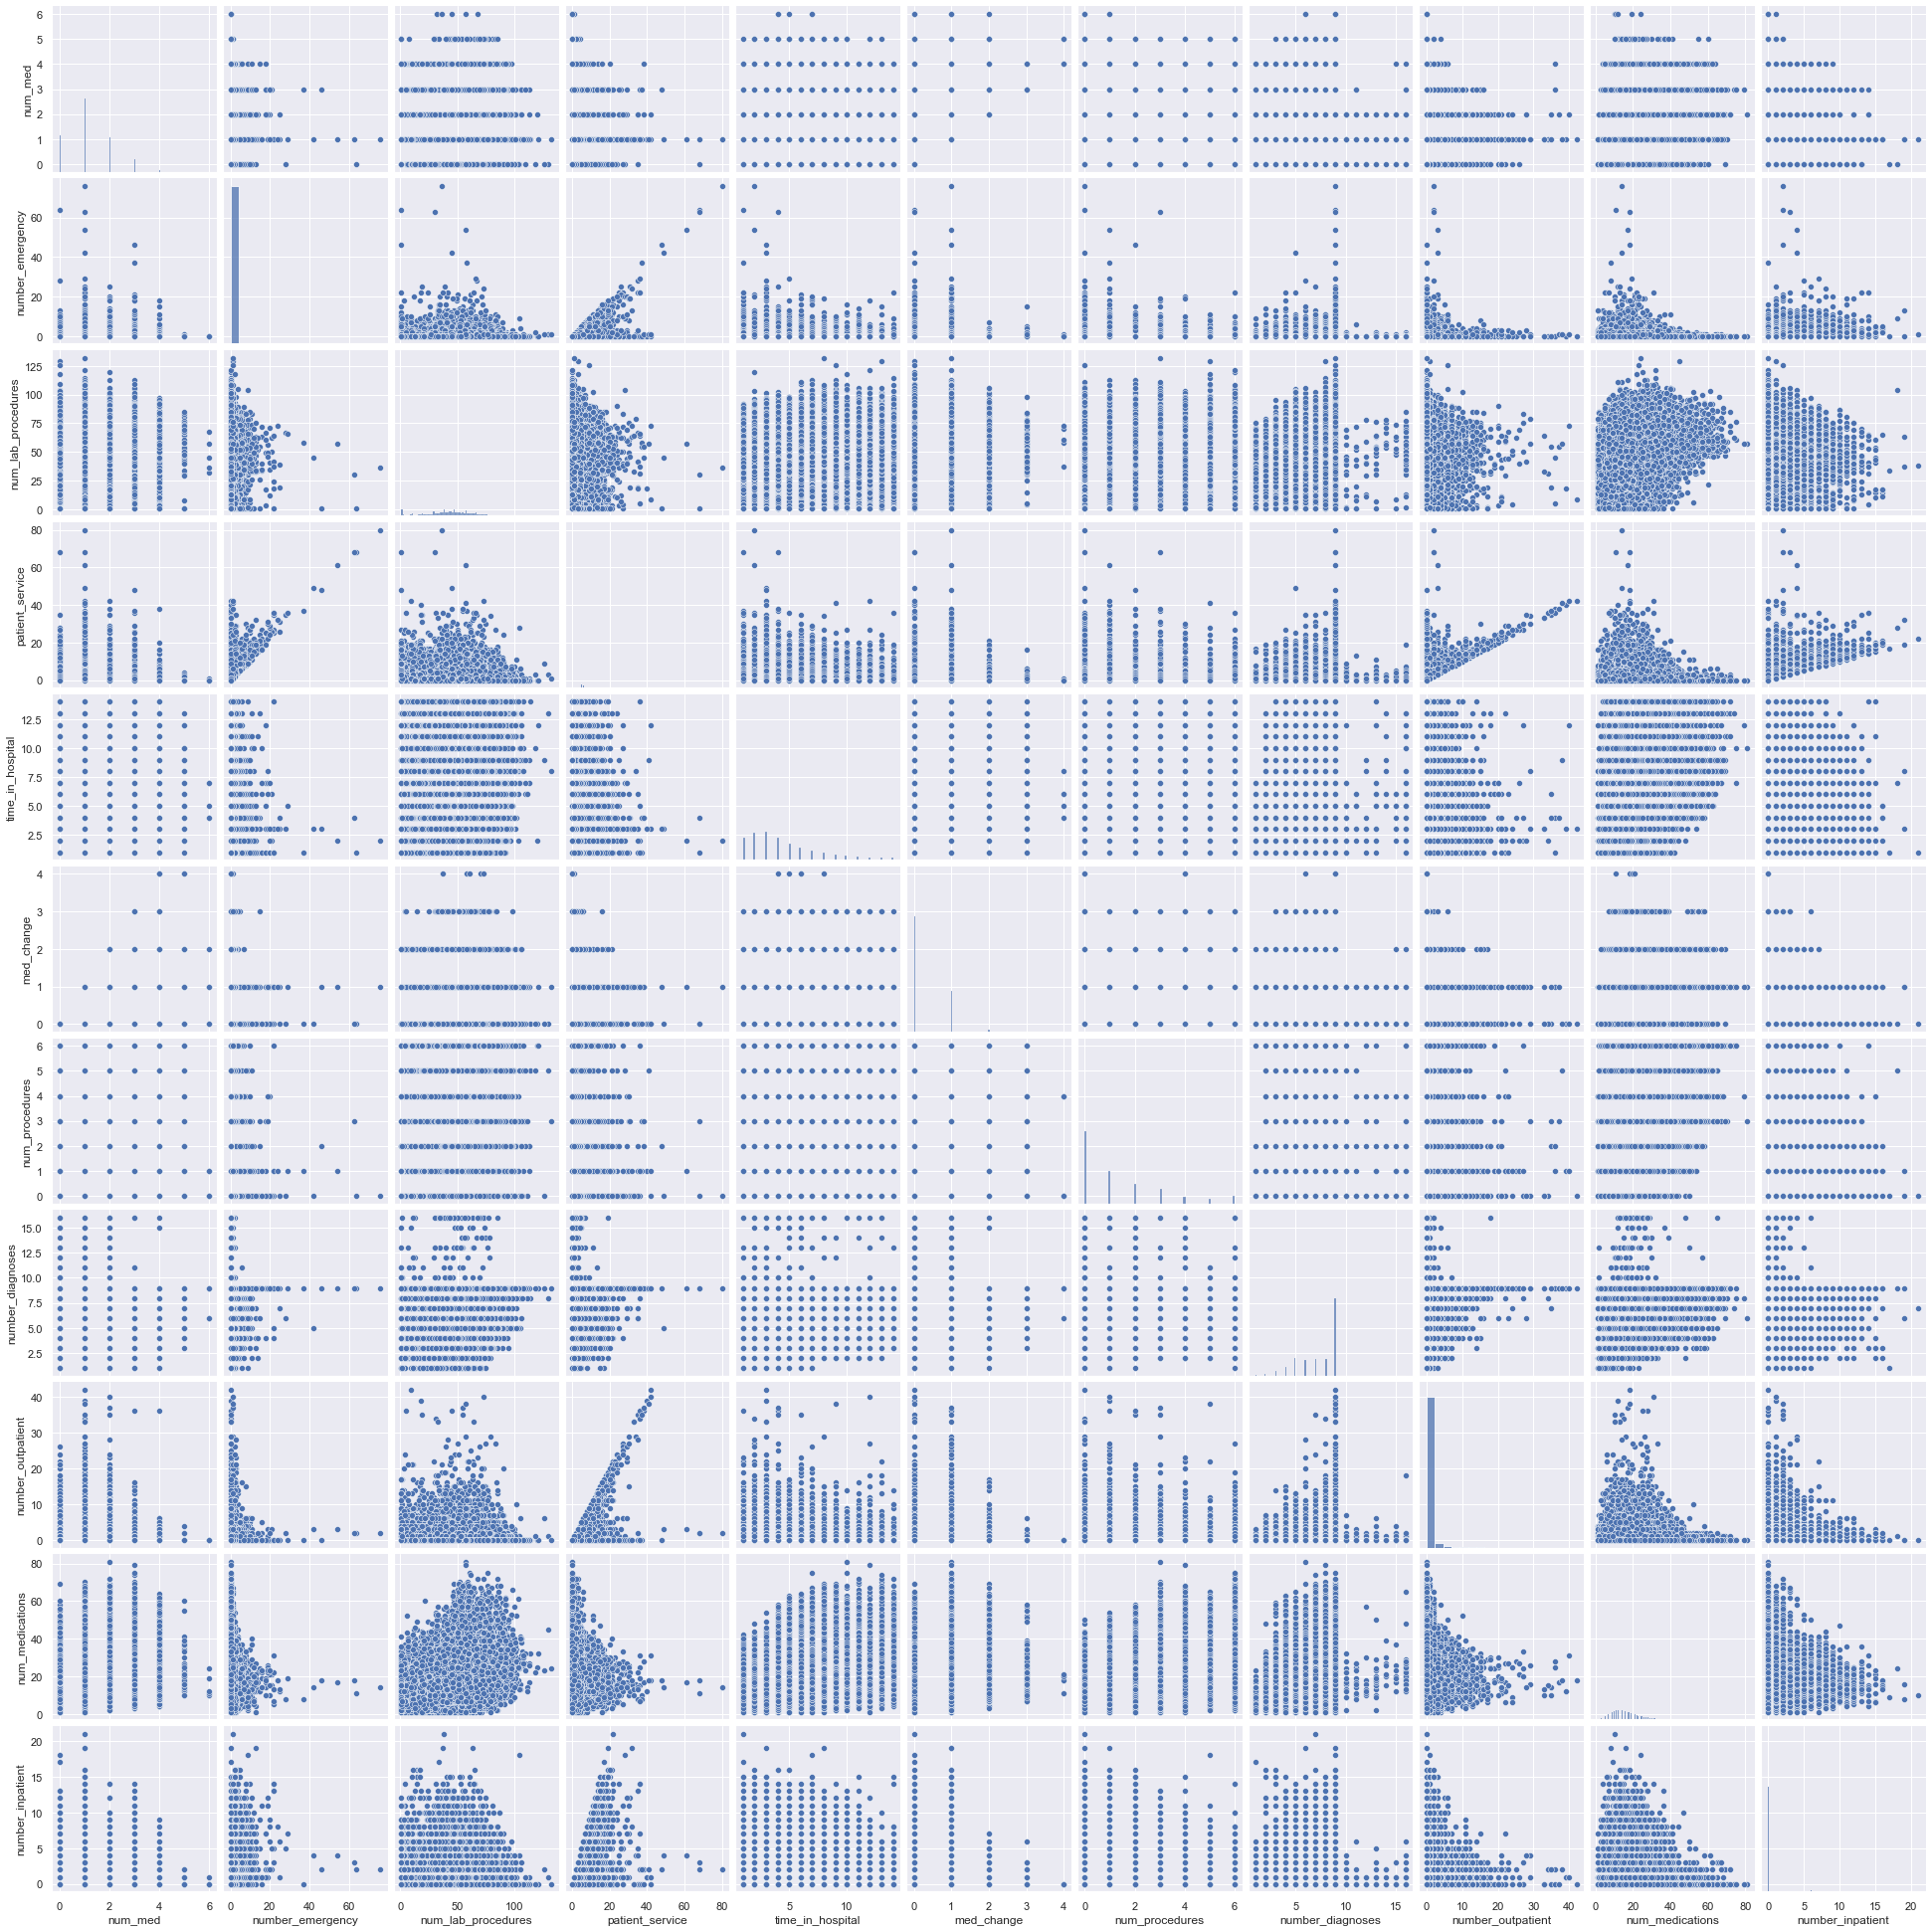

In [63]:
# Plot the pair scatter plot to check the distribution 
sns.set()
cols = ['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [64]:
# Check the skewness and kurtosis of the variables 
from scipy import stats
i=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
print(train[i].skew())
print(train[i].kurt())

num_med                0.678066
number_emergency      22.649042
num_lab_procedures    -0.239627
patient_service        5.313745
time_in_hospital       1.137276
med_change             1.423876
num_procedures         1.324363
number_diagnoses      -0.891600
number_outpatient      8.790942
num_medications        1.328952
number_inpatient       3.609237
dtype: float64
num_med                  0.282313
number_emergency      1163.612749
num_lab_procedures      -0.255417
patient_service         67.142638
time_in_hospital         0.867396
med_change               1.435763
num_procedures           0.891609
number_diagnoses        -0.073727
number_outpatient      147.256600
num_medications          3.513028
number_inpatient        20.612171
dtype: float64


In [65]:
"""From the scatter plot, we found most of numerical are highly skewed and had high kurtosis.
Using the threshold=+-1 as skewness for normal distributioon, 
If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
As the standard for kurtosis, the threhold=3 is for normal distribution. 
So the variables that need to be transformed are: 1. number_emergency 2. patient_service 3.time_in_hospital 4. med_change\
5. num_procedures 6.num_outpatient 7.num_medications 8. num_inpatient"""

'From the scatter plot, we found most of numerical are highly skewed and had high kurtosis.\nUsing the threshold=+-1 as skewness for normal distributioon, \nIf skewness is less than -1 or greater than 1, the distribution is highly skewed.\nIf skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.\nIf skewness is between -0.5 and 0.5, the distribution is approximately symmetric.\nAs the standard for kurtosis, the threhold=3 is for normal distribution. \nSo the variables that need to be transformed are: 1. number_emergency 2. patient_service 3.time_in_hospital 4. med_change5. num_procedures 6.num_outpatient 7.num_medications 8. num_inpatient'

### Log Transformation

In [66]:
# log transforamtion for the skewed numerical variables 
key=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
for col in key:
    if abs(train[col].skew())>=1:
        train[col+"_log"]=np.log1p(train[col])
        print([col+"_log"],train[col+"_log"].skew())

['number_emergency_log'] 3.6291030366340697
['patient_service_log'] 1.1064806833594183
['time_in_hospital_log'] 0.10341360716227363
['med_change_log'] 1.1350977887575229
['num_procedures_log'] 0.523122171785963
['number_outpatient_log'] 2.72014768343293
['num_medications_log'] -0.4851017786134751
['number_inpatient_log'] 1.4377657193647482


## Standarlization

In [67]:
"""We found different scale of the numeriable variables are in different scale which will cause
different weight to the analysis so we transform the variables into comparable scales"""

def standardize(data):
    return ((data - np.mean(data, axis = 0)) / np.std(data, axis = 0))
# num_col is a list of all numeric features
train[num_col] = standardize(train[num_col])

## Correlation

In [68]:
#Check the correlation between variables 
train.drop(train.columns[train.columns.str.contains('unnamed',case = False)],axis = 1,inplace=True)
train_col =train.corr()
train_col

race    gender       age  admission_type_id  \
race                      1.000000 -0.050809 -0.145205          -0.054262   
gender                   -0.050809  1.000000 -0.050932           0.013850   
age                      -0.145205 -0.050932  1.000000          -0.003878   
admission_type_id        -0.054262  0.013850 -0.003878           1.000000   
discharge_disposition_id  0.019087 -0.000476  0.010937           0.076466   
admission_source_id       0.034111 -0.010475  0.033821          -0.293059   
time_in_hospital          0.000207 -0.030035  0.107181          -0.023373   
num_lab_procedures        0.013708 -0.002938  0.016045          -0.157583   
num_procedures           -0.037112  0.061408 -0.028016           0.116596   
num_medications          -0.058105 -0.023371  0.041167           0.100392   
number_outpatient        -0.043579 -0.012447  0.023277           0.038878   
number_emergency          0.019049 -0.021249 -0.088274          -0.022500   
number_inpatient          0.014004 -0.015427 -0.045143          -0.040309   
number_diagnoses         -0.085892 -0.003744  0.243886          -0.108882   
max_glu_serum             0.033691  0.002143 -0.038323          -0.425338   
A1Cresult                -0.032263 -0.019265  0.118358           0.067250   
metformin                -0.006795  0.001827 -0.054261           0.020487   
repaglinide              -0.013901 -0.004898  0.051583          -0.018040   
nateglinide               0.009481 -0.004232  0.017685          -0.009980   
chlorpropamide           -0.007124  0.004385  0.014682           0.009332   
glimepiride              -0.022505  0.001175  0.039800          -0.011805   
acetohexamide            -0.001411 -0.002957  0.001840          -0.001889   
glipizide                -0.015687  0.028085  0.057537           0.009016   
glyburide                -0.021978  0.032357  0.081254           0.005022   
tolbutamide              -0.004987 -0.000319  0.012262           0.004399   
pioglitazone             -0.017489  0.005415  0.014721           0.014043   
rosiglitazone            -0.007138  0.013364  0.005604           0.016640   
acarbose                 -0.011538  0.013030  0.009064           0.004485   
miglitol                 -0.002940  0.006739  0.011994          -0.003880   
troglitazone             -0.002443  0.005985 -0.001441           0.002256   
tolazamide               -0.002181  0.007205  0.005394           0.008137   
insulin                   0.029430  0.000471 -0.089648          -0.030190   
glyburide-metformin      -0.003957  0.003506 -0.001476          -0.001606   
glipizide-metformin      -0.005087  0.007124  0.002187          -0.002828   
glimepiride-pioglitazone -0.001411 -0.002957 -0.000164          -0.001889   
metformin-rosiglitazone        NaN       NaN       NaN                NaN   
metformin-pioglitazone   -0.001411 -0.002957 -0.000164           0.002899   
change                   -0.008066  0.014978 -0.035979           0.009991   
diabetesMed              -0.005318  0.016331 -0.021227          -0.001303   
readmitted               -0.002082 -0.002725  0.019933          -0.013079   
patient_service          -0.008530 -0.024042 -0.048116          -0.009941   
med_change               -0.000049  0.006490 -0.065900           0.014715   
num_med                  -0.014712  0.027837  0.000856           0.000212   
primary_diag             -0.001552 -0.019594 -0.020984           0.067217   
secondary_diag           -0.001076 -0.023393  0.016575           0.023789   
additional_diag           0.001620 -0.011699  0.043849           0.016041   
number_emergency_log      0.030348 -0.029096 -0.089494          -0.026425   
patient_service_log      -0.010222 -0.026588 -0.010196          -0.000582   
time_in_hospital_log     -0.000870 -0.038551  0.120179          -0.033122   
med_change_log            0.000222  0.005454 -0.068390           0.014985   
num_procedures_log       -0.028751  0.053806 -0.027487           0.133922   
number_outpatient_log    -

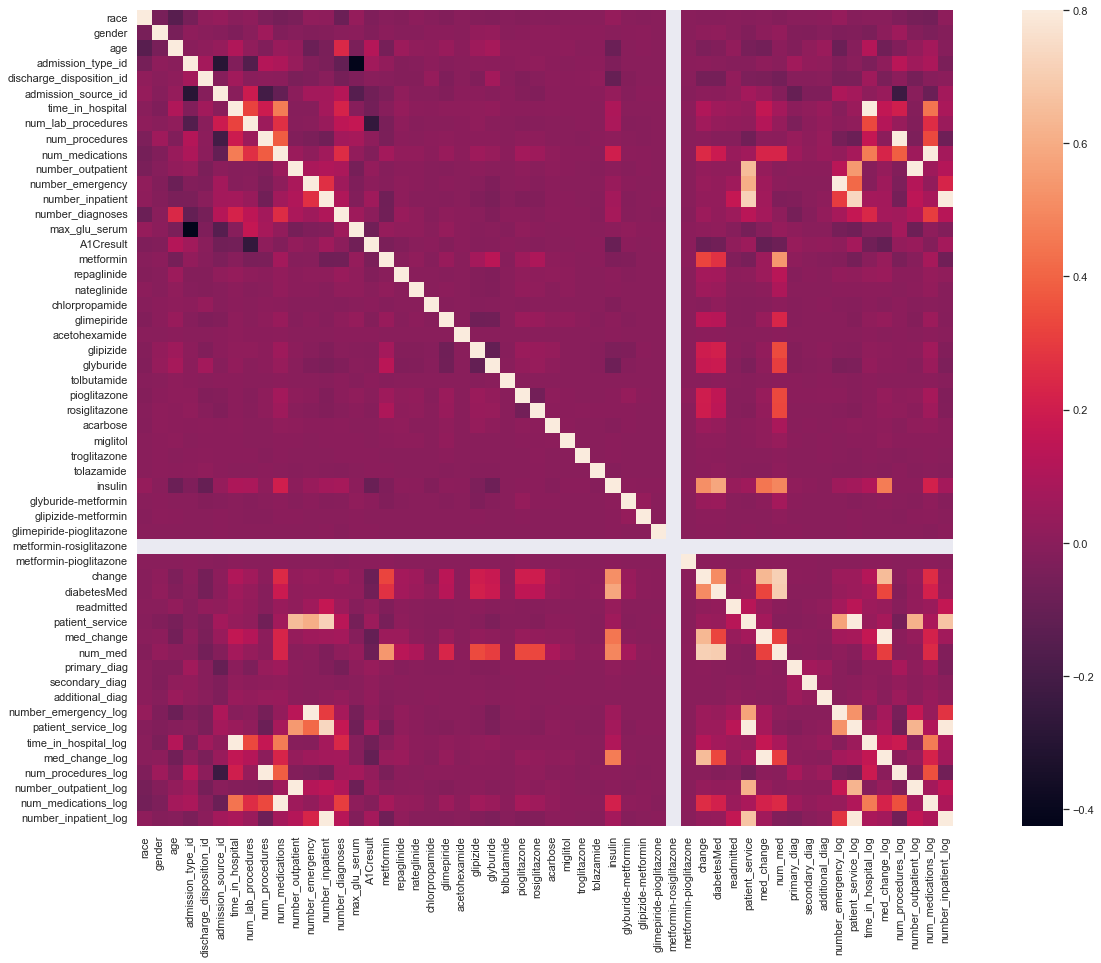

In [69]:
# Draw heatmap to plot the correlations
"""metformin-rosiglitazone is with all NAs"""
a = plt.subplots(figsize=(25, 15))
a = sns.heatmap(train_col, vmax=.8, square=True)

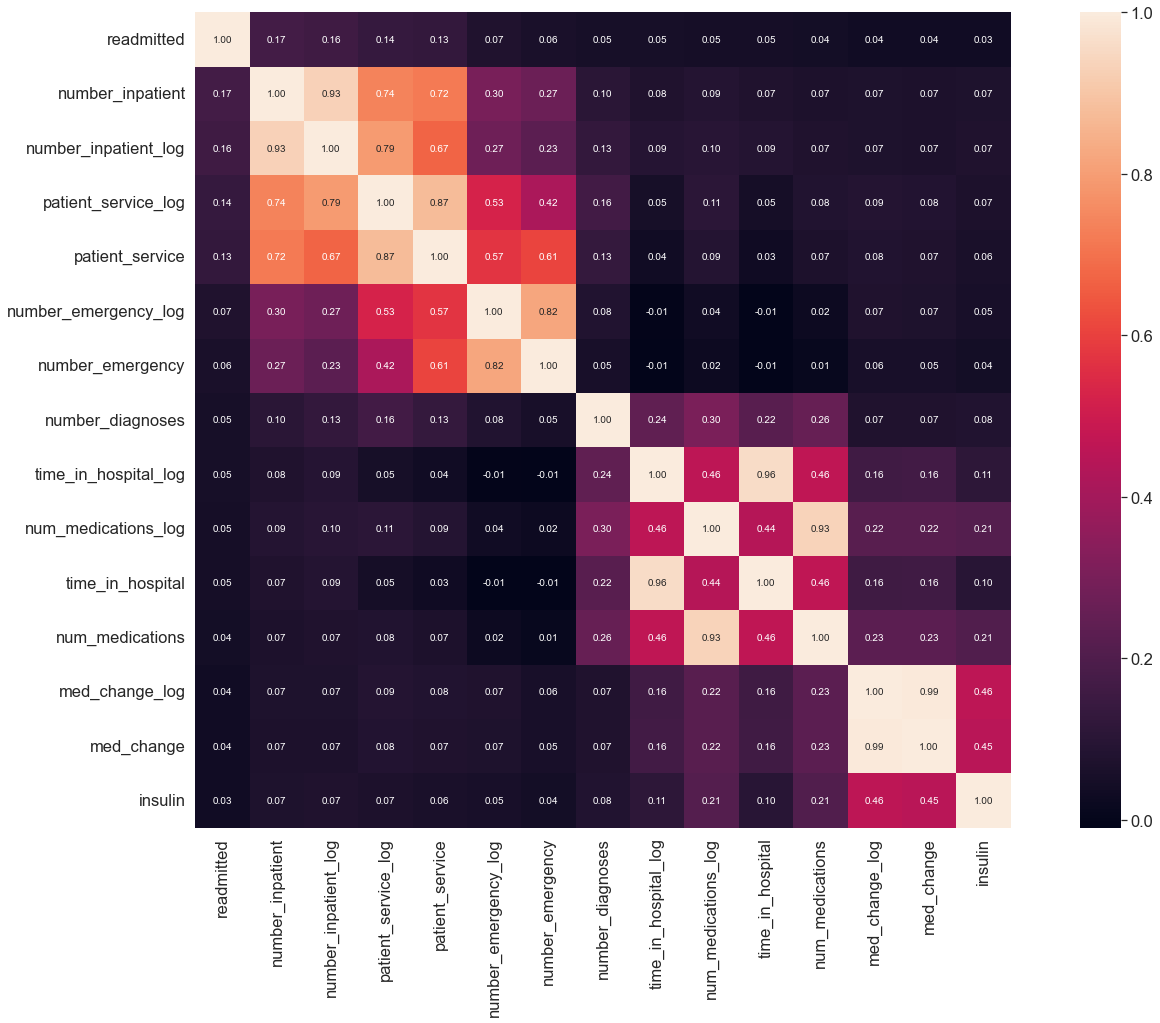

In [70]:
# find the top 15 correlated variables 
k = 15
cols = train_col.nlargest(k,'readmitted')['readmitted'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(25, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [71]:
train = train.drop('metformin-rosiglitazone',axis = 1)

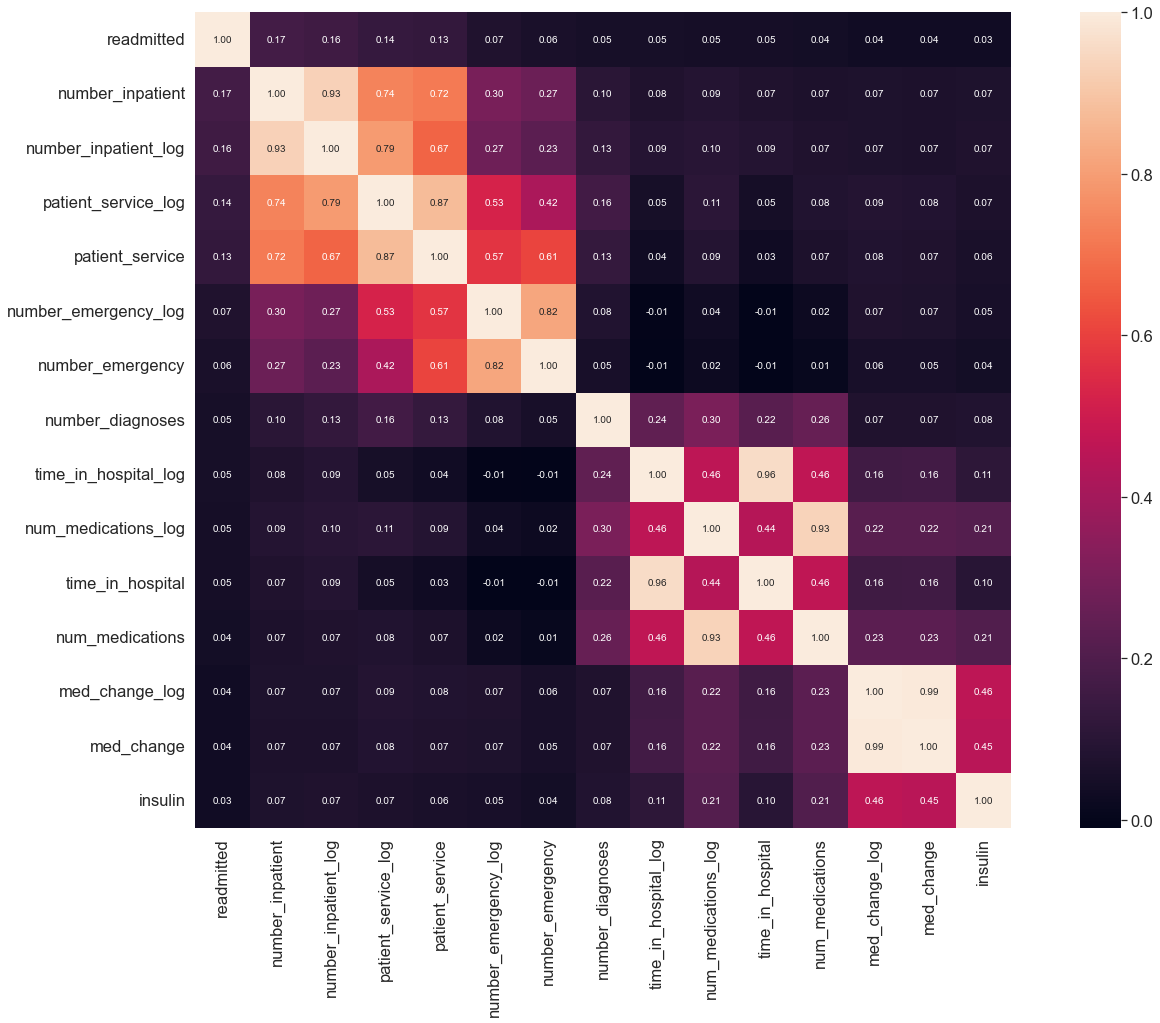

In [72]:
# find the top 15 correlated variables 
k = 15
cols = train_col.nlargest(k,'readmitted')['readmitted'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(25, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [73]:
train.diabetesMed = train.diabetesMed.astype('int64')
train.change = train.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-pioglitazone','A1Cresult']
train[i] = train[i].astype('int64')

train.dtypes

race                        float64
gender                      float64
age                         float64
admission_type_id           float64
discharge_disposition_id    float64
admission_source_id         float64
time_in_hospital            float64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
number_diagnoses            float64
max_glu_serum               float64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                   int64
pioglitazone                  int64
rosiglitazone                 int64
acarbose                    

## Outlier

In [74]:
key=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
train = train[(np.abs(sp.stats.zscore(train[key])) < 3).all(axis=1)]

In [75]:
train.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'patient_service', 'med_change', 'num_med',
       'primary_diag', 'secondary_diag', 'additional_diag',
       'number_emergency_log', 'patient_service_log', 'time_in_hospital_log',
       'med_change_log', 'num_procedures_log', 'number_outpatient_log',
       'num

In [76]:
for i in train.columns:
    df=train[i].value_counts()
    print(df)

-0.441350    68090
 1.409024    17275
 3.259398     1818
-2.291725     1346
 5.109772      590
Name: race, dtype: int64
-0.925045    48181
 1.081029    40938
Name: gender, dtype: int64
 0.575613    23003
-0.051337    19716
 1.202562    15188
-0.678286    15112
-1.305235     8352
-1.932185     3286
 1.829511     2467
-2.559134     1321
-3.186083      560
-3.813033      114
Name: age, dtype: int64
-0.591122    63365
 0.906931    16483
 2.404984     9261
 1.655957       10
Name: admission_type_id, dtype: int64
-0.293580    65653
-0.027368    18408
 4.232022     4287
 1.303691      537
 6.894141      127
 2.102327       93
 4.498234        8
 6.627929        4
 4.764446        2
Name: discharge_disposition_id, dtype: int64
 0.742895    56717
-1.433643    27147
-0.617441     5239
 0.470828       11
 1.287029        5
Name: admission_source_id, dtype: int64
-0.467585    16055
-0.803582    15559
-1.139580    12937
-0.131587    12456
 0.204411     8808
 0.540408     6515
 0.876406     5012
 1.

In [77]:
train['primary_diag'] = train['primary_diag'].astype('int')
train_v = pd.get_dummies(train, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'primary_diag'], drop_first = True)

In [78]:
train_v.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'patient_service', 'med_change', 'num_med',
       'secondary_diag', 'additional_diag', 'number_emergency_log',
       'patient_service_log', 'time_in_hospital_log', 'med_change_log',
       'num_procedures_log', 'number_outpatient_log', 'num_medications_log',
       'number_inpatient_log', 'race_-0.44135025988233306',
       'race_1.4090239846913777', 'race_3.2593982292650883',
       'race_5.10

In [79]:
train.columns


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'patient_service', 'med_change', 'num_med',
       'primary_diag', 'secondary_diag', 'additional_diag',
       'number_emergency_log', 'patient_service_log', 'time_in_hospital_log',
       'med_change_log', 'num_procedures_log', 'number_outpatient_log',
       'num

In [80]:
nom_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'primary_diag' ]

In [81]:
num_cols = list(set(list(train._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['number_outpatient',
 'chlorpropamide',
 'time_in_hospital',
 'patient_service',
 'glipizide',
 'med_change',
 'num_medications_log',
 'insulin',
 'acetohexamide',
 'acarbose',
 'number_emergency',
 'nateglinide',
 'diabetesMed',
 'additional_diag',
 'num_lab_procedures',
 'miglitol',
 'metformin',
 'glimepiride',
 'glyburide-metformin',
 'pioglitazone',
 'gender',
 'glimepiride-pioglitazone',
 'num_procedures_log',
 'num_medications',
 'number_outpatient_log',
 'tolazamide',
 'race',
 'rosiglitazone',
 'troglitazone',
 'patient_service_log',
 'time_in_hospital_log',
 'number_inpatient_log',
 'secondary_diag',
 'num_med',
 'number_inpatient',
 'med_change_log',
 'num_procedures',
 'admission_source_id',
 'glyburide',
 'age',
 'admission_type_id',
 'tolbutamide',
 'repaglinide',
 'metformin-pioglitazone',
 'discharge_disposition_id',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'number_emergency_log',
 'primary_diag',
 'glipizide-metformin']

In [82]:
# Append all columns with dummy variables 
nom_cols_new = []
for i in nom_cols:
    for j in train_v.columns:
        if i in j:
            nom_cols_new.append(j)

In [83]:
nom_cols_new

['race_-0.44135025988233306',
 'race_1.4090239846913777',
 'race_3.2593982292650883',
 'race_5.109772473838799',
 'gender_1.0810290074715079',
 'admission_type_id_0.9069308739627021',
 'admission_type_id_1.6559573065391138',
 'admission_type_id_2.4049837391155253',
 'discharge_disposition_id_-0.02736829112731426',
 'discharge_disposition_id_1.3036912539461765',
 'discharge_disposition_id_2.102326980990271',
 'discharge_disposition_id_4.232022253107856',
 'discharge_disposition_id_4.498234162122555',
 'discharge_disposition_id_4.764446071137253',
 'discharge_disposition_id_6.62792943424014',
 'discharge_disposition_id_6.894141343254838',
 'admission_source_id_-0.6174413417316502',
 'admission_source_id_0.4708275130935794',
 'admission_source_id_0.7428947267998868',
 'admission_source_id_1.2870291542125016',
 'max_glu_serum_-4.211859830994393',
 'max_glu_serum_0.23616383196679544',
 'A1Cresult_0',
 'primary_diag_0',
 'primary_diag_1',
 'primary_diag_2']

In [84]:
train_v.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'patient_service', 'med_change', 'num_med',
       'secondary_diag', 'additional_diag', 'number_emergency_log',
       'patient_service_log', 'time_in_hospital_log', 'med_change_log',
       'num_procedures_log', 'number_outpatient_log', 'num_medications_log',
       'number_inpatient_log', 'race_-0.44135025988233306',
       'race_1.4090239846913777', 'race_3.2593982292650883',
       'race_5.10

In [85]:
train_v.to_csv('./modified_diabetes1205_V2.csv',index=None)

In [86]:
train_v = pd.read_csv('./modified_diabetes1205_V2.csv')

In [87]:
train_v.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'patient_service', 'med_change', 'num_med',
       'secondary_diag', 'additional_diag', 'number_emergency_log',
       'patient_service_log', 'time_in_hospital_log', 'med_change_log',
       'num_procedures_log', 'number_outpatient_log', 'num_medications_log',
       'number_inpatient_log', 'race_-0.44135025988233306',
       'race_1.4090239846913777', 'race_3.2593982292650883',
       'race_5.10

In [88]:
train_v.head().T

0         1         2         3  \
age                               -3.186083 -2.559134 -1.932185 -1.305235   
time_in_hospital                  -0.467585 -0.803582 -0.803582 -1.139580   
num_lab_procedures                 0.818775 -1.625187  0.055037  0.411448   
num_procedures                    -0.784194  2.159864 -0.195382 -0.784194   
num_medications                    0.249085 -0.369407  0.001688 -0.987898   
...                                     ...       ...       ...       ...   
max_glu_serum_0.23616383196679544  1.000000  1.000000  1.000000  1.000000   
A1Cresult_0                        1.000000  1.000000  1.000000  1.000000   
primary_diag_0                     0.000000  0.000000  0.000000  0.000000   
primary_diag_1                     0.000000  0.000000  0.000000  0.000000   
primary_diag_2                     0.000000  0.000000  0.000000  1.000000   

                                          4  
age                               -0.678286  
time_in_hospital                  -0.467585  
num_lab_procedures                -0.606870  
num_procedures                     2.748676  
num_medications                    0.001688  
...                                     ...  
max_glu_serum_0.23616383196679544  1.000000  
A1Cresult_0                        1.000000  
primary_diag_0                     1.000000  
primary_diag_1                     0.000000  
primary_diag_2                     0.000000  

[71 rows x 5 columns]

In [89]:
for i in train_v.columns:
    print(f"{i}: {train_v[i].unique()}")

age: [-3.18608327 -2.55913397 -1.93218468 -1.30523538 -0.67828608 -0.05133679
  0.57561251  1.20256181  1.8295111  -3.81303257]
time_in_hospital: [-0.46758472 -0.80358239 -1.13958006 -0.13158704  0.20441063  2.89239199
  2.55639432  1.54840131  0.87640597  1.88439898  2.22039665  0.5404083
  1.21240364]
num_lab_procedures: [ 0.81877455 -1.62518673  0.05503665  0.41144767 -0.60686953  1.37884902
  1.5315966   1.2770173  -0.50503781  0.20778423  0.97152213  0.61511111
  0.30961595  1.63342832  0.10595251 -0.70870125 -0.40320609 -0.04679507
 -1.21785985  1.07335386 -0.91236469  0.51327939  0.46236353  2.24441864
 -0.81053297 -0.30137437 -0.09771093 -0.75961711 -0.35229023  0.25870009
 -1.67610259 -2.08342948  1.12426972  1.22610144 -0.14862679  0.76785869
  0.71694283 -0.55595367  2.0407552  -0.45412195 -0.19954265  1.32793316
 -0.25045851 -1.06511227  2.70266138  0.15686837  1.48068074  0.66602697
  0.92060627  2.2953345   0.86969041  1.17518558  0.00412079  0.36053181
 -2.13434534 -1.26

# Modeling 

In [90]:
train_input = train_v.drop('readmitted',axis=1)
train_output = train_v['readmitted']

In [91]:
train_input.head().T

0         1         2         3  \
age                               -3.186083 -2.559134 -1.932185 -1.305235   
time_in_hospital                  -0.467585 -0.803582 -0.803582 -1.139580   
num_lab_procedures                 0.818775 -1.625187  0.055037  0.411448   
num_procedures                    -0.784194  2.159864 -0.195382 -0.784194   
num_medications                    0.249085 -0.369407  0.001688 -0.987898   
...                                     ...       ...       ...       ...   
max_glu_serum_0.23616383196679544  1.000000  1.000000  1.000000  1.000000   
A1Cresult_0                        1.000000  1.000000  1.000000  1.000000   
primary_diag_0                     0.000000  0.000000  0.000000  0.000000   
primary_diag_1                     0.000000  0.000000  0.000000  0.000000   
primary_diag_2                     0.000000  0.000000  0.000000  1.000000   

                                          4  
age                               -0.678286  
time_in_hospital                  -0.467585  
num_lab_procedures                -0.606870  
num_procedures                     2.748676  
num_medications                    0.001688  
...                                     ...  
max_glu_serum_0.23616383196679544  1.000000  
A1Cresult_0                        1.000000  
primary_diag_0                     1.000000  
primary_diag_1                     0.000000  
primary_diag_2                     0.000000  

[70 rows x 5 columns]

In [92]:
train_output.head().T

0    0
1    0
2    0
3    0
4    0
Name: readmitted, dtype: int64

Class 0: 79512
Class 1: 9607
Proportion: 8.28 : 1


<AxesSubplot:title={'center':'Count (target)'}>

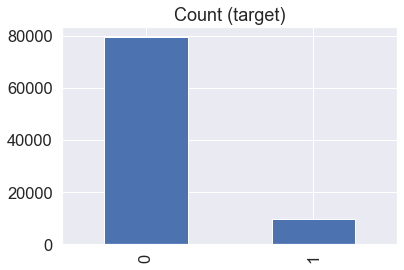

In [93]:
# Check the class for the outcome variable 
target_count=train_v['readmitted'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

In [100]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

sns.set(style='white', context='notebook', palette='deep')

In [101]:
# Split the training and testing dataset 
x_train, x_test, y_train, y_test= model_selection.train_test_split(train_input, train_output, random_state = 0, test_size=0.1)

Class 0: 79512
Class 1: 9607
Proportion: 8.28 : 1


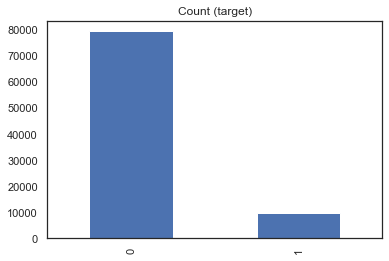

In [102]:
import numpy as np
import pandas as pd

target_count = train_output.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

## Class Imbalance 

In [103]:
pip install imbalanced-learn==0.6.0


Note: you may need to restart the kernel to use updated packages.


In [104]:
# Class Imbalance Processing: Using re-sampling method
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 79512, 1: 9607})
New dataset shape Counter({0: 79512, 1: 79512})


In [105]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [106]:
pd.concat([pd.DataFrame(train_input_new), pd.DataFrame(train_output_new)],axis=1).to_csv('./smote_data.csv',header=None)

In [107]:
# Again,split the training and testing dataset 
x_train_new, x_test_new, y_train_new, y_test_new= model_selection.train_test_split(train_input_new, train_output_new, random_state = 0, test_size=0.1)

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

C:\Users\user\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi Layer Perception (MLP) 
 
 Confusion Matrix: 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


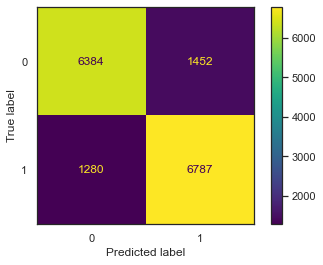

Score
Accuracy   0.828209
Precision  0.823765
Recall     0.841329
F-score    0.832454
ROC AUC    0.828015
PR AUC     0.872791

In [109]:
mlp = MLPClassifier(hidden_layer_sizes=(128,64), max_iter=30, activation = 'relu',solver='adam')
mlp.fit(x_train_new, y_train_new)
mlp_predictions = mlp.predict(x_test_new)
mlp_confusion = confusion_matrix(y_test_new, mlp_predictions)
mlp_accuracy = accuracy_score(y_test_new, mlp_predictions)
mlp_precision = precision_score(y_test_new, mlp_predictions)
mlp_recall = recall_score(y_test_new, mlp_predictions)  
precision, recall, thresholds = precision_recall_curve(y_test_new, mlp_predictions)
mlp_f1 = f1_score(y_test_new, mlp_predictions)
mlp_roc_auc = roc_auc_score(y_test_new, mlp_predictions)

mlp_f1 = f1_score(y_test_new, mlp_predictions)
mlp_roc_auc = roc_auc_score(y_test_new, mlp_predictions)
mlp_pr_auc = auc(recall, precision)

print("Multi Layer Perception (MLP) \n \n Confusion Matrix: \n")
mlp_conf = plot_confusion_matrix(mlp, x_test_new, y_test_new, values_format = '.0f')
plt.show()

mlp_scores = pd.DataFrame({'Score': [mlp_accuracy, mlp_precision, mlp_recall, mlp_f1, mlp_roc_auc, mlp_pr_auc]})
mlp_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
mlp_scores

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitte

K Nearest Neighbor (KNN) 
 
 Confusion Matrix: 



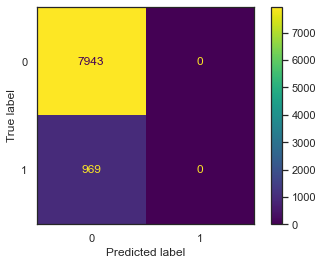

Score
Accuracy   0.891270
Precision  0.000000
Recall     0.000000
F-score    0.000000
ROC AUC    0.500000
PR AUC     0.554365

In [111]:
knn = KNeighborsClassifier(n_neighbors = 316) 
knn.fit(x_train, y_train) 
knn_predictions = knn.predict(x_test)
knn_confusion = confusion_matrix(y_test, knn_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)
precision, recall, thresholds = precision_recall_curve(y_test, knn_predictions)

print("K Nearest Neighbor (KNN) \n \n Confusion Matrix: \n")
knn_conf = plot_confusion_matrix(knn, x_test, y_test, values_format = '.0f')
plt.show()
knn_pr_auc = auc(recall, precision)

knn_scores = pd.DataFrame({'Score': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc, knn_pr_auc]})
knn_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
knn_scores

In [112]:
train_input = train_v.drop('readmitted',axis=1)
train_output = train_v['readmitted']
train_v['readmitted'].value_counts()

0    79512
1     9607
Name: readmitted, dtype: int64

In [113]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 79512, 1: 9607})
New dataset shape Counter({0: 79512, 1: 79512})


# Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, x_train_new, y_train_new, cv=10))))
forrest.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(forrest.score(x_test_new, y_test_new)))

Cross Validation score: 92.23%
Dev Set score: 92.40%


In [115]:
y_test_predict = forrest.predict(x_test_new)
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

Predict     0     1   All
Actual                   
0        3088  2488  5576
1         388   309   697
All      3476  2797  6273

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_forreste = accuracy_score(y_test_new, y_test_predict)
precision_forreste = precision_score(y_test_new, y_test_predict)
recall_forreste = recall_score(y_test_new, y_test_predict)
auc_forreste = roc_auc_score(y_test_new, y_test_predict)

Accuracy is 0.92
Precision is 0.98
Recall is 0.87
AUC is 0.92


In [117]:
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, x_train_new, y_train_new, cv=10))))
forrest.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(forrest.score(x_test_new, y_test_new)))

Cross Validation score: 92.13%
Dev Set score: 92.32%


In [118]:
y_test_predict = forrest.predict(x_test_new)
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

Predict     0     1   All
Actual                   
0        3069  2507  5576
1         385   312   697
All      3454  2819  6273

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_forrestg = accuracy_score(y_test_new, y_test_predict)
precision_forrestg = precision_score(y_test_new, y_test_predict)
recall_forrestg = recall_score(y_test_new, y_test_predict)
auc_forrestg = roc_auc_score(y_test_new, y_test_predict)

Accuracy is 0.92
Precision is 0.98
Recall is 0.87
AUC is 0.92


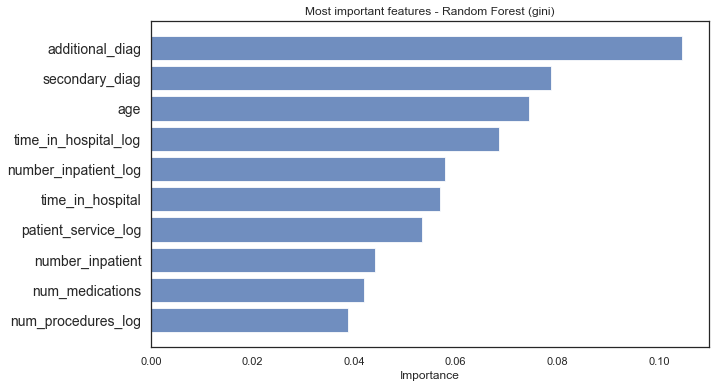

In [120]:
# Create list of top most features based on importance
feature_names = x_train_new.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest (gini)')
plt.show()

# Xgboost

In [121]:
import pandas as pd
import xgboost as xgb
import operator

In [122]:
def result (y_test_new, y_test_predict):
    print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
    print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
    print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
    print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

In [123]:
for max_depth in [3,4,5,6,7,8,9]:
    xgb_params = {'booster':'gbtree','objective': 'binary:logistic', "eta": 0.2, \
                  "max_depth": max_depth,"colsample_bytree":0.7, 'silent':1}
    a = list(xgb_params.items())
    num_rounds = 20000

    dtrain = xgb.DMatrix(x_train_new, label=y_train_new)
    dtest= xgb.DMatrix(x_test_new, label=y_test_new)
    evallist = [(dtrain, 'train'), (dtest, 'test')]
    gbm = xgb.train(a,dtrain, num_rounds, evals=evallist,verbose_eval=100,early_stopping_rounds=100)
    y_predict = gbm.predict(xgb.DMatrix(x_test_new))
    result(y_test_new,np.round(y_predict))

C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:02:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.66301	test-logloss:0.66211
[100]	train-logloss:0.22708	test-logloss:0.22782
[200]	train-logloss:0.19755	test-logloss:0.20001
[300]	train-logloss:0.18887	test-logloss:0.19323
[400]	train-logloss:0.18408	test-logloss:0.19017
[500]	train-logloss:0.18080	test-logloss:0.18854
[600]	train-logloss:0.178

C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:04:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:04:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.65071	test-logloss:0.64958
[100]	train-logloss:0.20358	test-logloss:0.20538
[200]	train-logloss:0.18589	test-logloss:0.19222
[300]	train-logloss:0.17801	test-logloss:0.18904
[400]	train-logloss:0.17235	test-logloss:0.18753
[500]	train-logloss:0.16805	test-logloss:0.18716
[600]	train-logloss:0.164

C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:06:00] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:06:00] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.63592	test-logloss:0.63450
[100]	train-logloss:0.19105	test-logloss:0.19683
[200]	train-logloss:0.17509	test-logloss:0.18968
[300]	train-logloss:0.16484	test-logloss:0.18783
[400]	train-logloss:0.15754	test-logloss:0.18789
[477]	train-logloss:0.15271	test-logloss:0.18801
Accuracy is 0.94
Precisio

C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:07:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.62786	test-logloss:0.62667
[100]	train-logloss:0.18129	test-logloss:0.19304
[200]	train-logloss:0.16168	test-logloss:0.18827
[300]	train-logloss:0.14794	test-logloss:0.18914
[309]	train-logloss:0.14727	test-logloss:0.18928
Accuracy is 0.94
Precision is 1.00
Recall is 0.88
AUC is 0.94


C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:08:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:08:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.61655	test-logloss:0.61514
[100]	train-logloss:0.17218	test-logloss:0.19180
[200]	train-logloss:0.14705	test-logloss:0.18846
[288]	train-logloss:0.13097	test-logloss:0.18995
Accuracy is 0.94
Precision is 1.00
Recall is 0.88
AUC is 0.94


C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:09:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:09:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.61080	test-logloss:0.60937
[100]	train-logloss:0.15673	test-logloss:0.19020
[200]	train-logloss:0.12657	test-logloss:0.19058
[254]	train-logloss:0.11405	test-logloss:0.19236
Accuracy is 0.94
Precision is 1.00
Recall is 0.88
AUC is 0.94


C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:11:22] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:11:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.60352	test-logloss:0.60258
[100]	train-logloss:0.14298	test-logloss:0.18906
[200]	train-logloss:0.10770	test-logloss:0.19194
[219]	train-logloss:0.10219	test-logloss:0.19297
Accuracy is 0.94
Precision is 1.00
Recall is 0.88
AUC is 0.94


In [124]:
for colsample_bytree in [0.6, 0.7, 0.8, 0.9, 1]:
    xgb_params = {'booster':'gbtree','objective': 'binary:logistic', "eta": 0.2, \
                  "max_depth": 8,"colsample_bytree":colsample_bytree, 'silent':1}
    num_rounds = 20000
    a = list(xgb_params.items())

    dtrain = xgb.DMatrix(x_train_new, label=y_train_new)
    dtest= xgb.DMatrix(x_test_new, label=y_test_new)
    evallist = [(dtrain, 'train'), (dtest, 'test')]
    gbm = xgb.train(a, dtrain, num_rounds, evals=evallist,verbose_eval=100,early_stopping_rounds=100)
    y_predict = gbm.predict(xgb.DMatrix(x_test_new))
    result(y_test_new,np.round(y_predict))

C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:12:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:12:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.60910	test-logloss:0.60780
[100]	train-logloss:0.15980	test-logloss:0.18980
[200]	train-logloss:0.12757	test-logloss:0.18967
[249]	train-logloss:0.11689	test-logloss:0.19152
Accuracy is 0.94
Precision is 1.00
Recall is 0.88
AUC is 0.94


C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:13:50] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:13:50] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.61080	test-logloss:0.60937
[100]	train-logloss:0.15673	test-logloss:0.19020
[200]	train-logloss:0.12657	test-logloss:0.19058
[255]	train-logloss:0.11374	test-logloss:0.19239
Accuracy is 0.94
Precision is 1.00
Recall is 0.88
AUC is 0.94


C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:15:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:15:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.61096	test-logloss:0.60953
[100]	train-logloss:0.15668	test-logloss:0.18975
[200]	train-logloss:0.12523	test-logloss:0.19068
[232]	train-logloss:0.11879	test-logloss:0.19176
Accuracy is 0.94
Precision is 1.00
Recall is 0.88
AUC is 0.94


C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:16:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:16:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.61093	test-logloss:0.60949
[100]	train-logloss:0.15648	test-logloss:0.19023
[200]	train-logloss:0.12451	test-logloss:0.19175
[231]	train-logloss:0.11628	test-logloss:0.19310
Accuracy is 0.94
Precision is 1.00
Recall is 0.88
AUC is 0.94


C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:18:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:18:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.61093	test-logloss:0.60949
[100]	train-logloss:0.15560	test-logloss:0.18989
[200]	train-logloss:0.12537	test-logloss:0.19044
[227]	train-logloss:0.11941	test-logloss:0.19143
Accuracy is 0.94
Precision is 1.00
Recall is 0.88
AUC is 0.94


In [125]:
for eta in [0.01, 0.02, 0.05]: 
    xgb_params = {'booster':'gbtree','objective': 'binary:logistic', "eta": eta, \
                  "max_depth": 8,"colsample_bytree":0.9,  'silent':1}
    num_rounds = 20000
    a = list(xgb_params.items())

    dtrain = xgb.DMatrix(x_train_new, label=y_train_new)
    dtest= xgb.DMatrix(x_test_new, label=y_test_new)
    evallist = [(dtrain, 'train'), (dtest, 'test')]
    gbm = xgb.train(a, dtrain, num_rounds, evals=evallist,verbose_eval=100,early_stopping_rounds=100)
    y_predict = gbm.predict(xgb.DMatrix(x_test_new))
    result(y_test_new,np.round(y_predict))
xb_acc=accuracy_score(y_test_new, np.round(y_test_predict))
xb_per=precision_score(y_test_new, np.round(y_test_predict))
xb_rec=recall_score(y_test_new, np.round(y_test_predict))
xb_roc_auc=roc_auc_score(y_test_new, np.round(y_test_predict))

C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:19:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:19:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.68870	test-logloss:0.68851
[100]	train-logloss:0.44321	test-logloss:0.44259
[200]	train-logloss:0.34219	test-logloss:0.34325
[300]	train-logloss:0.28630	test-logloss:0.28935
[400]	train-logloss:0.25165	test-logloss:0.25681
[500]	train-logloss:0.22931	test-logloss:0.23651
[600]	train-logloss:0.213

C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:39:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.68421	test-logloss:0.68394
[100]	train-logloss:0.34185	test-logloss:0.34288
[200]	train-logloss:0.25028	test-logloss:0.25548
[300]	train-logloss:0.21307	test-logloss:0.22230
[400]	train-logloss:0.19410	test-logloss:0.20666
[500]	train-logloss:0.18365	test-logloss:0.19883
[600]	train-logloss:0.177

C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:50:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.67093	test-logloss:0.67051
[100]	train-logloss:0.22784	test-logloss:0.23515
[200]	train-logloss:0.18333	test-logloss:0.19882
[300]	train-logloss:0.16911	test-logloss:0.19163
[400]	train-logloss:0.15852	test-logloss:0.18905
[500]	train-logloss:0.14967	test-logloss:0.18800
[600]	train-logloss:0.141

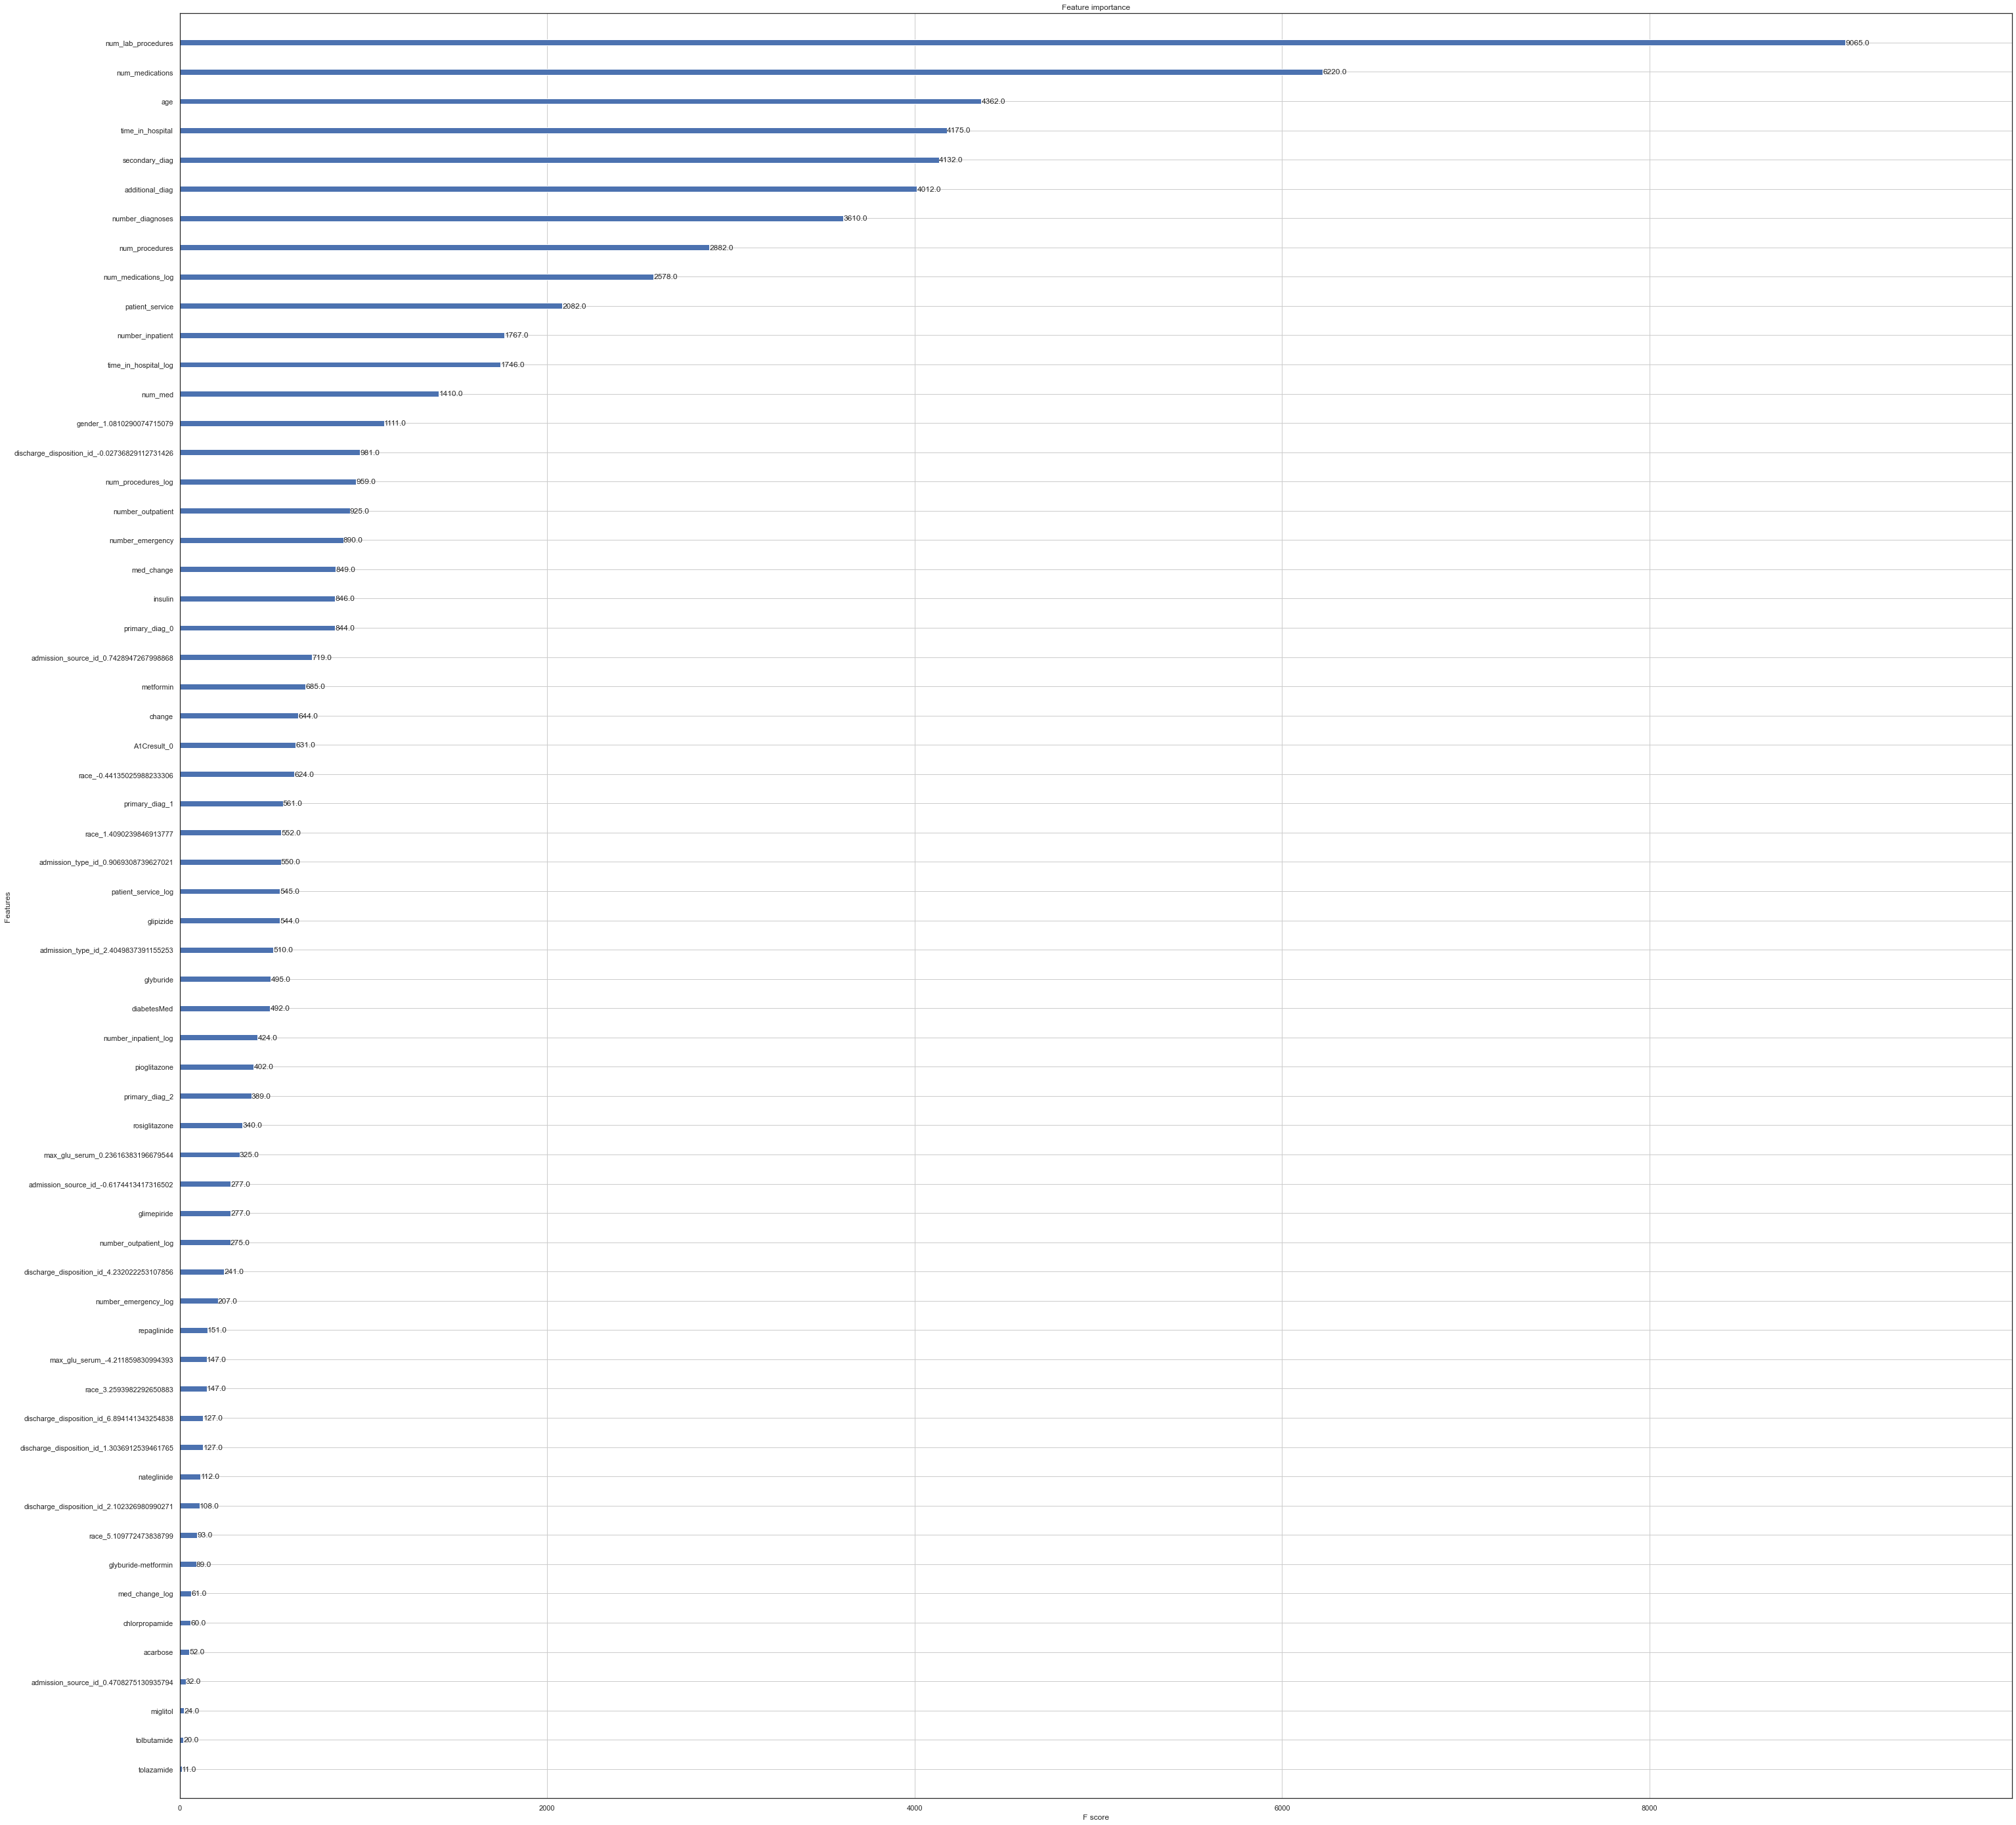

In [134]:
ax = xgb.plot_importance(gbm)
fig = ax.figure
fig.set_size_inches(50,50)

In [127]:
xb_acc=accuracy_score(y_test_new, np.round(y_test_predict))
xb_per=precision_score(y_test_new, np.round(y_test_predict))
xb_rec=recall_score(y_test_new, np.round(y_test_predict))
xb_roc_auc=roc_auc_score(y_test_new, np.round(y_test_predict))

The scores below show an improvement in prediction using these algorithms, when compared to the Baseline scores obtained above

In [128]:
model_scores = pd.DataFrame({'Model': ['RandomForest', 'K Nearest Neighbor (KNN)', 'Xrboost','MLP'],'Accuracy score': [accuracy_forreste, knn_accuracy, xb_acc,mlp_accuracy], 'Precision Score': [precision_forreste, knn_precision, xb_per,mlp_precision], 'Recall Score': [recall_forreste, knn_recall, xb_rec,mlp_recall], 'ROC AUC Score': [recall_forreste, knn_roc_auc, xb_roc_auc,mlp_roc_auc]})
model_scores.index = np.arange(1, len(model_scores)+1)
model_scores

Model  Accuracy score  Precision Score  Recall Score  \
1              RandomForest        0.924006         0.978156      0.869479   
2  K Nearest Neighbor (KNN)        0.891270         0.000000      0.000000   
3                   Xrboost        0.923188         0.977382      0.868548   
4                       MLP        0.828209         0.823765      0.841329   

   ROC AUC Score  
1       0.869479  
2       0.500000  
3       0.923946  
4       0.828015

In [129]:
df_results = pd.DataFrame({'classifier':['RF', 'KNN', 'Xgboost','Mlp'],
                           
                          'auc':[accuracy_forreste, knn_accuracy, xb_acc,mlp_accuracy]})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


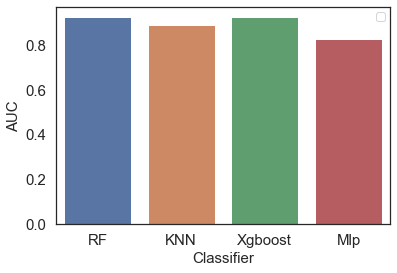

In [130]:
ax = sns.barplot(x="classifier", y="auc", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend()
plt.show()

In [131]:
from sklearn.preprocessing import StandardScaler
inp = (-3.1860832692060916,-0.4675847157372516,0.818774554219486,-0.7841939341748582,0.24908501357661605,-0.293250511369207,-0.21358442406331182,-0.5040649752128761,0.815034341267885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.526326348834385,1.456929051721552,-0.19875367486857698,0.7995596597244166,-0.9162123964778066,0.0,0.0,1.3862943611198906,0.6931471805599453,0.0,0.0,2.9444389791664403,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0)
arr=np.asarray(inp)
Reshaping = arr.reshape(1,-1)
standard_scalar = StandardScaler()
stddata = standard_scalar.fit_transform(Reshaping)
predict = mlp.predict(stddata)
print(predict)

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [132]:
from sklearn.preprocessing import StandardScaler
inp =(-1.3052353792133298,-1.1395800574421697,0.4114476729099166,-0.7841939341748582,-0.987898293742432,-0.293250511369207,-0.21358442406331182,-0.5040649752128761,-1.2566104847185438,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.526326348834385,-0.5902212794440861,0.8857934294441061,2.530158371068804,0.8795209716516476,0.0,0.0,0.6931471805599453,0.0,0.0,0.0,2.1972245773362196,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0)
arr=np.asarray(inp)
Reshaping = arr.reshape(1,-1)
standard_scalar = StandardScaler()
stddata = standard_scalar.fit_transform(Reshaping)
predict = mlp.predict(stddata)
print(predict)

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [133]:
from sklearn.preprocessing import StandardScaler
inp =(-0.6782860825490757,-0.4675847157372516,-0.6068695303640068,2.74867604544379,0.0016883521128064388,-0.293250511369207,-0.21358442406331182,-0.5040649752128761,0.815034341267885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.526326348834385,-0.5902212794440861,-0.19875367486857698,-0.4983893737838739,0.8795209716516476,0.0,0.0,1.3862943611198906,0.0,1.9459101490553132,0.0,2.833213344056216,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0)
arr=np.asarray(inp)
Reshaping = arr.reshape(1,-1)
standard_scalar = StandardScaler()
stddata = standard_scalar.fit_transform(Reshaping)
predict = forrest.predict(stddata)
print(predict)

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
